In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
path = "./data/易访库20210519.xls"

In [4]:
df_all = pd.read_excel(path)

In [5]:
df_all 

,PROD_ID,TOUCH_FLAG,CALL_TIME,VIP_LEVEL,ONLINE_MONTH,GENDER,IF_BLACK,AGE_SEG,IF_GROUP,IF_SCHOOL,...,CALL_NET_DRTN02,VOICE_CHRG,DATA_CHRG,CALLED_DRTN,CALLED_DRTN01,CALLED_DRTN02,CALL_COUNT,CALLING_DRTN,CALLING_DRTN01,CALLING_DRTN02
0,2.344048e+11,接通成功,2021-04-09 10:42:05,4.0,42.0,1.0,N,30.0,N,N,...,16531.0,1.53,74.13,450.0,362.0,445.0,268.0,459.0,293.0,701.0
1,2.342082e+11,拨打未接通,2021-04-09 10:42:05,5.0,137.0,1.0,N,60.0,N,N,...,15469.0,1.85,92.75,542.0,556.0,419.0,184.0,400.0,600.0,600.0
2,2.342065e+11,接通成功,2021-04-09 10:39:03,5.0,143.0,2.0,N,40.0,N,N,...,2156.0,1.28,56.33,52.0,106.0,109.0,45.0,60.0,160.0,78.0
3,2.343997e+11,拨打未接通,2021-04-09 10:39:03,4.0,46.0,1.0,N,30.0,N,N,...,760.0,-17.70,60.11,204.0,133.0,28.0,166.0,270.0,122.0,29.0
4,2.346437e+11,接通成功,2021-04-09 10:35:31,3.0,18.0,1.0,N,25.0,N,N,...,799.0,1.20,65.41,10.0,43.0,13.0,2.0,3.0,16.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,2.342304e+11,接通成功,2021-04-10 09:07:05,5.0,97.0,1.0,N,45.0,N,N,...,2308.0,0.97,46.72,104.0,29.0,93.0,33.0,121.0,36.0,61.0
22539,2.342278e+11,接通成功,2021-04-10 09:15:48,4.0,98.0,1.0,N,25.0,N,N,...,3030.0,2.30,111.84,140.0,114.0,174.0,71.0,146.0,113.0,132.0
22540,2.343453e+11,接通成功,2021-04-10 09:14:21,4.0,74.0,1.0,N,50.0,N,N,...,8116.0,2.06,94.08,52.0,116.0,99.0,76.0,134.0,243.0,196.0
22541,2.342222e+11,接通成功,2021-04-10 09:19:26,4.0,99.0,1.0,N,45.0,N,N,...,1597.0,2.30,105.54,163.0,111.0,158.0,54.0,139.0,70.0,94.0


In [12]:
df_all.TOUCH_FLAG.keys

<bound method Series.keys of 0         接通成功
1        拨打未接通
2         接通成功
3        拨打未接通
4         接通成功
         ...  
22538     接通成功
22539     接通成功
22540     接通成功
22541     接通成功
22542     接通成功
Name: TOUCH_FLAG, Length: 22543, dtype: object>

In [9]:
# 接通成功的正样本
df_Y = df_all[df_all['TOUCH_FLAG']=='接通成功']
# 接通不成功的负样本
df_N = df_all[df_all['TOUCH_FLAG']=='接通不成功']
# 拨打未接通的样本
df_X = df_all[df_all['TOUCH_FLAG']=='拨打未接通']

In [13]:
print('总样本个数：' + str(len(df_all)))
print('正样本个数：' + str(len(df_Y)))
print('负样本个数：' + str(len(df_N)))
print('未接通样本个数：' + str(len(df_X)))

总样本个数：22543
正样本个数：1774
负样本个数：5582
未接通样本个数：15187


In [8]:
df_Y

,PROD_ID,VIP_LEVEL,ONLINE_MONTH,GENDER,IF_BLACK,AGE_SEG,IF_GROUP,IF_SCHOOL,IF_BRD,IF_DBL_TRMNL,...,DATA_CHRG,CALLED_DRTN,CALLED_DRTN01,CALLED_DRTN02,CALL_COUNT,CALLING_DRTN,CALLING_DRTN01,CALLING_DRTN02,success,IF_TOUCH
1,234401899570,5.0,41,2,N,55,N,N,Y,Y,...,0.00,0,0.0,0.0,0,0,0.0,0.0,0,1
10,234399701744,5.0,43,1,N,45,N,N,Y,Y,...,100.95,3,40.0,25.0,5,8,34.0,31.0,0,1
13,234368345602,5.0,64,2,N,40,N,N,Y,Y,...,0.00,34,21.0,41.0,8,14,18.0,17.0,0,1
17,234207436004,5.0,137,1,N,55,N,N,Y,Y,...,60.11,260,146.0,181.0,71,248,128.0,201.0,0,1
22,234370384834,5.0,61,1,N,50,N,N,Y,Y,...,0.00,0,0.0,0.0,2,4,0.0,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9881,234404458896,6.0,40,1,N,45,N,N,Y,N,...,0.00,67,80.0,32.0,6,6,52.0,29.0,0,1
9884,234409191495,5.0,36,1,N,35,N,N,Y,Y,...,0.00,19,12.0,11.0,0,0,0.0,0.0,1,1
9926,234390334048,5.0,49,1,N,60,N,N,Y,N,...,111.62,46,26.0,25.0,31,33,21.0,14.0,0,1
9948,234411510567,3.0,36,2,N,30,N,N,Y,Y,...,82.16,250,245.0,186.0,129,315,770.0,655.0,0,1


In [14]:
# 所有的标签字段
tags = df_all.columns

In [15]:
tags

Index(['PROD_ID', 'TOUCH_FLAG', 'CALL_TIME', 'VIP_LEVEL', 'ONLINE_MONTH',
       'GENDER', 'IF_BLACK', 'AGE_SEG', 'IF_GROUP', 'IF_SCHOOL', 'IF_BRD',
       'IF_DBL_TRMNL', 'TRMNL_AGE', 'IF_4G_TRMNL', 'IF_VOLTE', 'BRD_RAX',
       'CARD_3G_F', 'BRD_ACTIVE_DAYS', 'IF_ITV', 'CHRG', 'CHRG01', 'CHRG02',
       'DATA_FLOW_AMNT', 'DATA_FLOW_AMNT01', 'DATA_FLOW_AMNT02', 'CALL_DRTN',
       'CALL_DRTN01', 'CALL_DRTN02', 'DATA_FLOW_AMNT_PRV',
       'DATA_FLOW_AMNT_PRV01', 'DATA_FLOW_AMNT_PRV02',
       'DATA_FLOW_AMNT_ROAM_PRV', 'DATA_FLOW_AMNT_ROAM_PRV01',
       'DATA_FLOW_AMNT_ROAM_PRV02', 'DATA_FLOW_AMNT_5G', 'DATA_FLOW_AMNT_4G',
       'SMS_COUNT', 'CALLING_NET_COUNT', 'CALL_NET_DRTN', 'CALL_NET_DRTN01',
       'CALL_NET_DRTN02', 'VOICE_CHRG', 'DATA_CHRG', 'CALLED_DRTN',
       'CALLED_DRTN01', 'CALLED_DRTN02', 'CALL_COUNT', 'CALLING_DRTN',
       'CALLING_DRTN01', 'CALLING_DRTN02'],
      dtype='object')

In [16]:
def compulete_count_normalized(data, min_v, max_v, space, label='counts'):
    """
    统计一列中各个区间中数值的个数和其对应归一化的值
    data: 列的Series形式
    min_v: 区间最小值
    max_v: 区间最大值
    space： 区间间隔
    """
    # 处理最大、最小值
    if max_v % 10 > 0:
        max_v = max_v - (max_v % 10) + 10
    if min_v % 10 > 0:
        min_v = min_v - (min_v % 10)
    # 需要分段的区间
    sections = [x for x in range(min_v, max_v, space)]
    # 每个区间中的个数
    counts = []
    # 每个区间中的个数的比例即归一化
    counts_normalize = []
    for i in range(0, len(sections)-1):
        # 区间中个数统计
        part_count = data.value_counts(bins=[sections[i], sections[i+1]-1])
        part_count_normalize = data.value_counts(bins=[sections[i], sections[i+1]-1], normalize=True)
        counts.append(part_count)
        counts_normalize.append(part_count_normalize)
    # 合并Series
    result1 = pd.DataFrame(pd.concat([x for x in counts]))
    result2 = pd.DataFrame(pd.concat([x for x in counts_normalize]))
    # 对列的标签进行重命名
    result1.rename(columns={result1.columns[0]:label},inplace=True)
    result2.rename(columns={result2.columns[0]:'normalized'}, inplace=True)
    # 合并两个表
    result = pd.concat([result1, result2], axis=1)
    return result

In [17]:
def compulete_count_normalized_categories(data):
    """
    统计类别的个数及其归一化值
    """
    counts = data.value_counts()
    counts_normalize = data.value_counts(normalize=True)
    # 合并Series
    result1 = pd.DataFrame(counts)
    result2 = pd.DataFrame(counts_normalize)
    # 对列的标签进行重命名
    result1.rename(columns={result1.columns[0]:'counts'},inplace=True)
    result2.rename(columns={result2.columns[0]:'normalized'}, inplace=True)
    # 合并两个表
    result = pd.concat([result1, result2], axis=1)
    return result

In [18]:
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']

# 对VIP_LEVEL的统计分析 

In [19]:
df_all.VIP_LEVEL.min()

1.0

In [20]:
df_all.VIP_LEVEL.max()

99.0

In [26]:
all_vip_level = compulete_count_normalized_categories(df_all.VIP_LEVEL)
y_vip_level = compulete_count_normalized_categories(df_Y.VIP_LEVEL)
n_vip_level = compulete_count_normalized_categories(df_N.VIP_LEVEL)
x_vip_level = compulete_count_normalized_categories(df_X.VIP_LEVEL)

In [27]:
all_vip_level

,counts,normalized
4.0,8169,0.366290
5.0,6970,0.312528
3.0,3605,0.161645
2.0,1963,0.088019
1.0,888,0.039817
6.0,464,0.020805
99.0,128,0.005739
7.0,115,0.005156


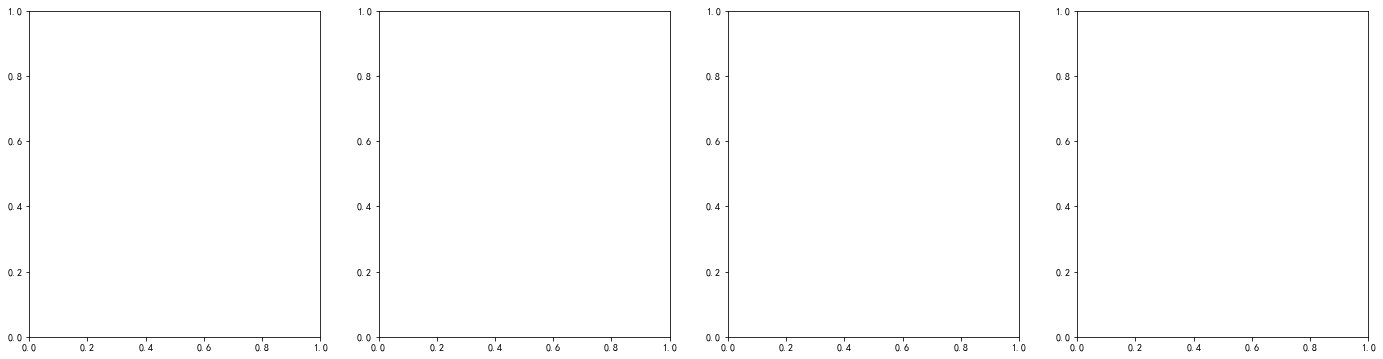

In [31]:
# 规划多图显示
fig,axes = plt.subplots(1, 4, figsize=(24, 6))

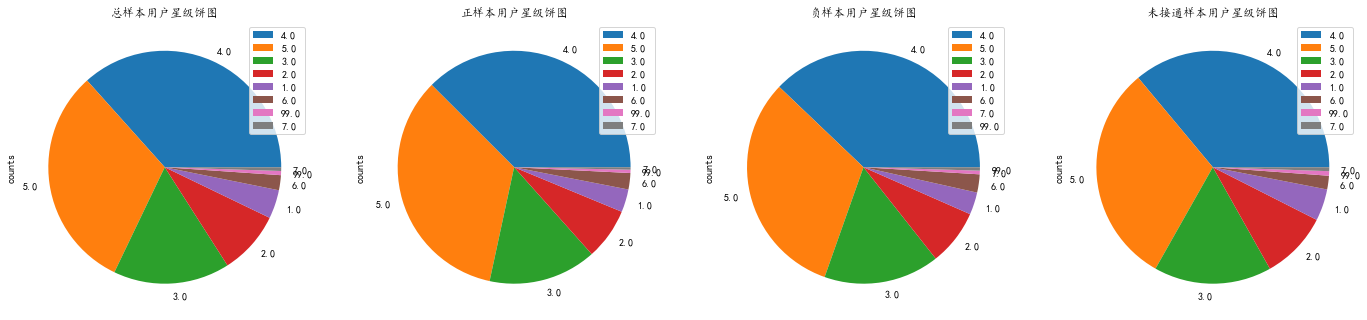

In [32]:
all_vip_level.plot(kind="pie", y="counts", title='总样本用户星级饼图', ax=axes[0])
y_vip_level.plot.pie(y="counts",title='正样本用户星级饼图', ax=axes[1])
n_vip_level.plot.pie(y="counts",title='负样本用户星级饼图', ax=axes[2])
x_vip_level.plot.pie(y="counts",title='未接通样本用户星级饼图', ax=axes[3])
fig

总样本与正样本分布相近，且正样本中分布较为平均，分析价值不大

# 对ONLINE_MONTH的统计分析

In [37]:
all_result = compulete_count_normalized(df_all.ONLINE_MONTH, 0, 200, 10)
Y_result = compulete_count_normalized(df_Y.ONLINE_MONTH, 0, 200, 10)
N_result = compulete_count_normalized(df_N.ONLINE_MONTH, 0, 200, 10)
X_result = compulete_count_normalized(df_X.ONLINE_MONTH, 0, 200, 10)

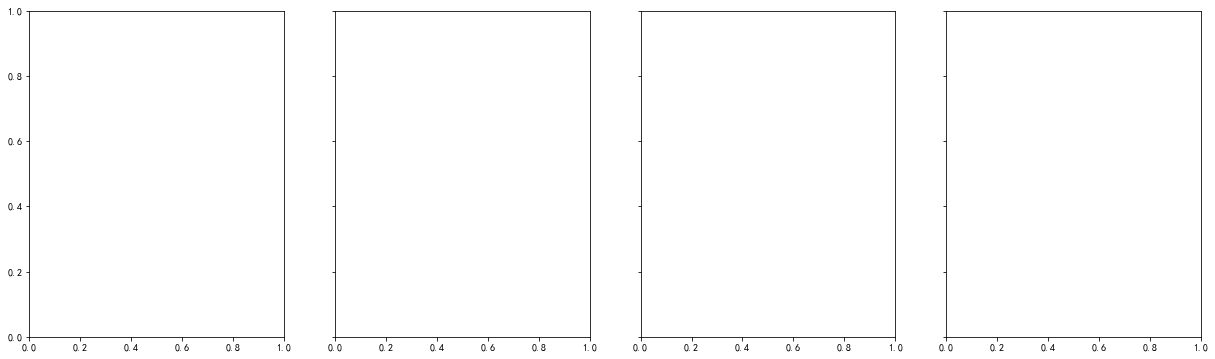

In [39]:
fig,axes = plt.subplots(1, 4, figsize=(21, 6),sharey=True)

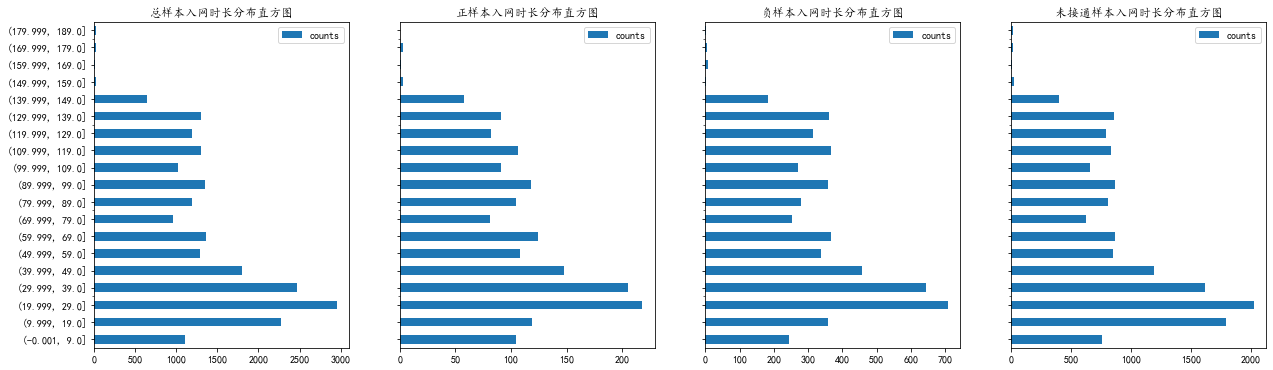

In [40]:
all_result.plot.barh(y="counts",title='总样本入网时长分布直方图', ax=axes[0])
Y_result.plot.barh(y="counts",title='正样本入网时长分布直方图', ax=axes[1])
N_result.plot.barh(y="counts",title='负样本入网时长分布直方图', ax=axes[2])
X_result.plot.barh(y="counts",title='未接通样本入网时长分布直方图', ax=axes[3])
fig

# 对GENDER的统计分析

In [44]:
all_gender_result = compulete_count_normalized_categories(df_all.GENDER)
y_gender_result = compulete_count_normalized_categories(df_Y.GENDER)
n_gender_result = compulete_count_normalized_categories(df_N.GENDER)
x_gender_result = compulete_count_normalized_categories(df_X.GENDER)

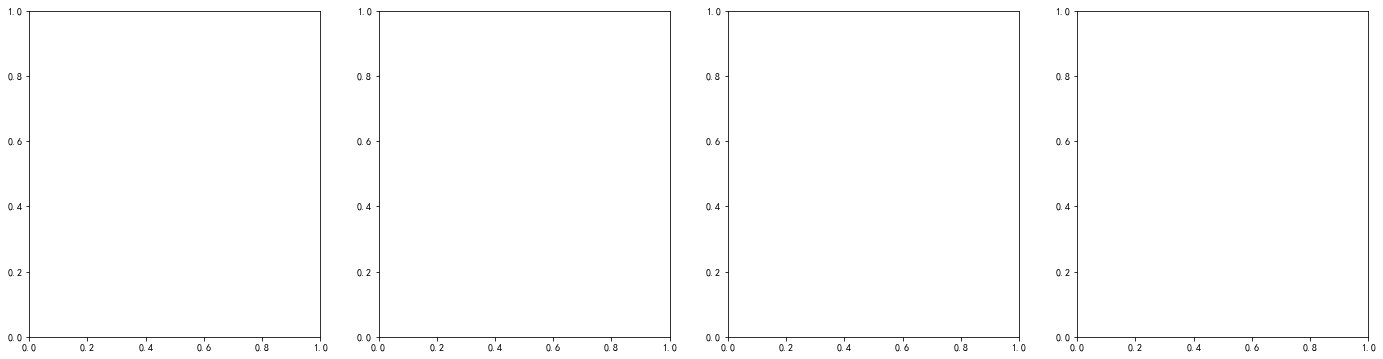

In [45]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6))

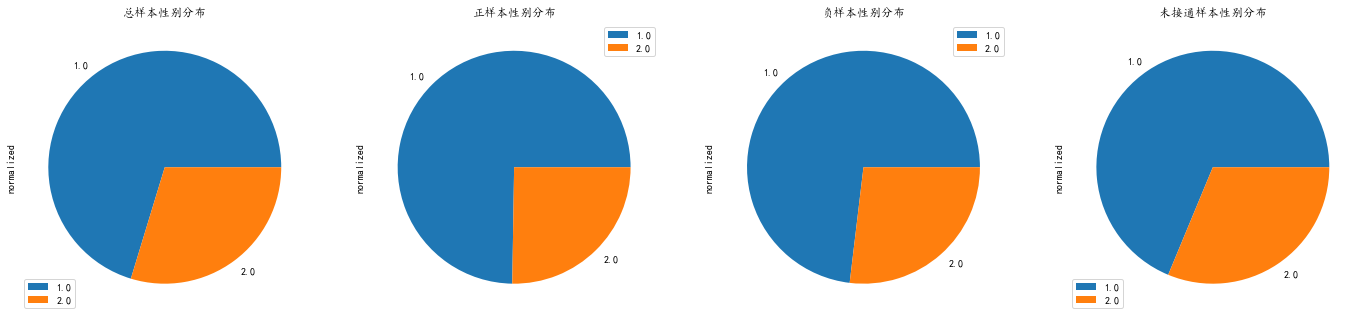

In [46]:
all_gender_result.plot.pie(y='normalized',title='总样本性别分布', ax=axes[0])
y_gender_result.plot.pie(y='normalized',  title='正样本性别分布', ax=axes[1])
n_gender_result.plot.pie(y='normalized',  title='负样本性别分布', ax=axes[2])
x_gender_result.plot.pie(y='normalized',  title='未接通样本性别分布', ax=axes[3])
fig

# 对AGE_SEG的统计分析

In [47]:
all_age_result = compulete_count_normalized(df_all.AGE_SEG, 10, 100, 5)
y_age_result = compulete_count_normalized(df_Y.AGE_SEG, 10, 100, 5)
n_age_result = compulete_count_normalized(df_N.AGE_SEG, 10, 100, 5)
x_age_result = compulete_count_normalized(df_X.AGE_SEG, 10, 100, 5)

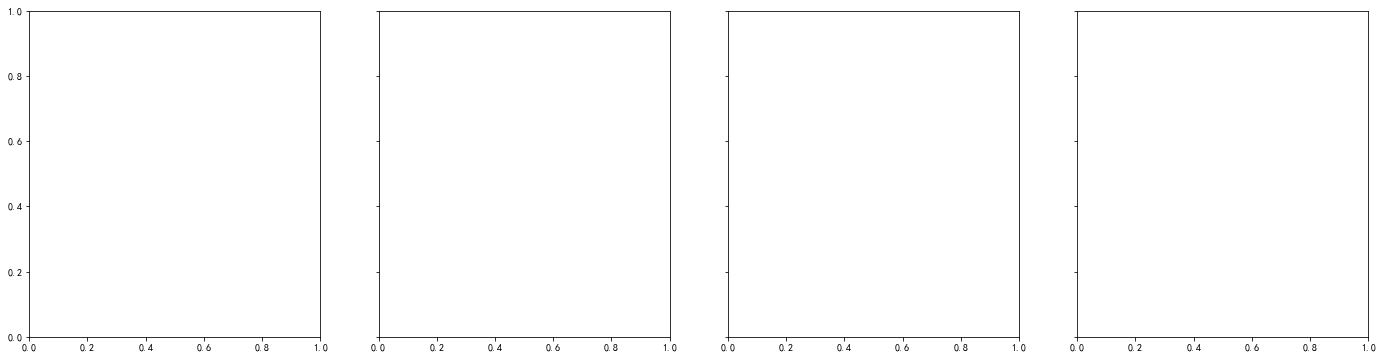

In [48]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6),sharey=True)

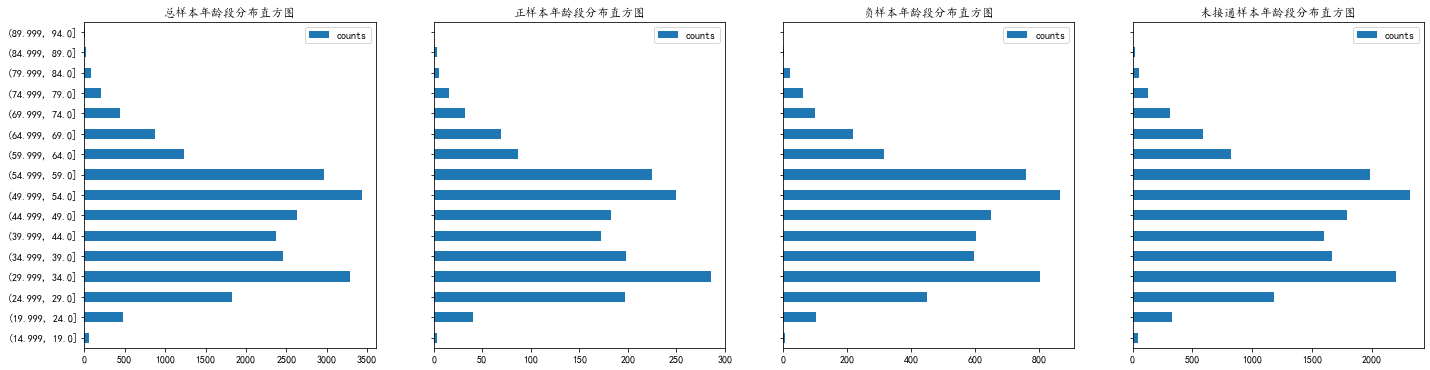

In [49]:
all_age_result.plot.barh(y="counts", title='总样本年龄段分布直方图', ax=axes[0])
y_age_result.plot.barh(y="counts", title='正样本年龄段分布直方图', ax=axes[1])
n_age_result.plot.barh(y="counts", title='负样本年龄段分布直方图', ax=axes[2])
x_age_result.plot.barh(y="counts", title='未接通样本年龄段分布直方图', ax=axes[3])
fig

总样本年龄段数据采集不均衡，当前分析主要年段集中在20——60岁， 参考价值不大

# 对IF_GROUP的统计分析

In [50]:
all_if_group = compulete_count_normalized_categories(df_all.IF_GROUP)
y_if_group = compulete_count_normalized_categories(df_Y.IF_GROUP)
n_if_group = compulete_count_normalized_categories(df_N.IF_GROUP)
x_if_group = compulete_count_normalized_categories(df_X.IF_GROUP)

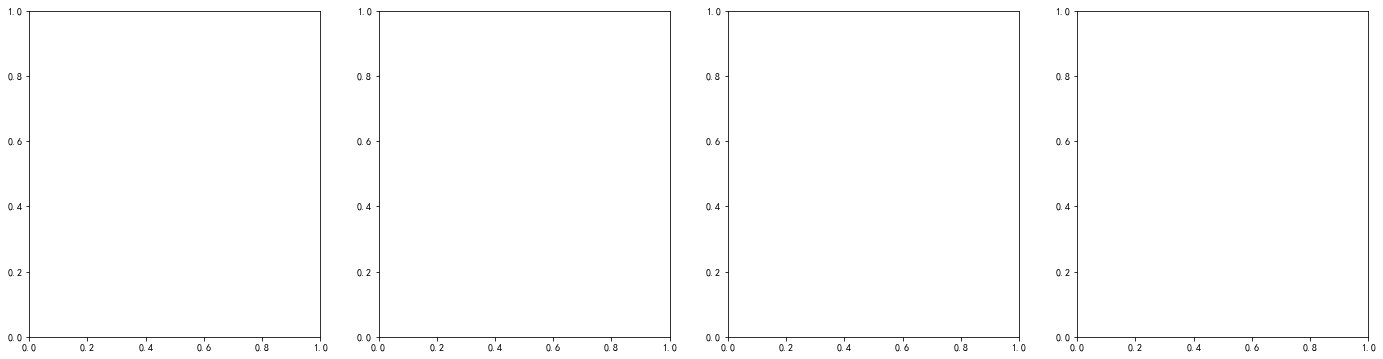

In [51]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6))

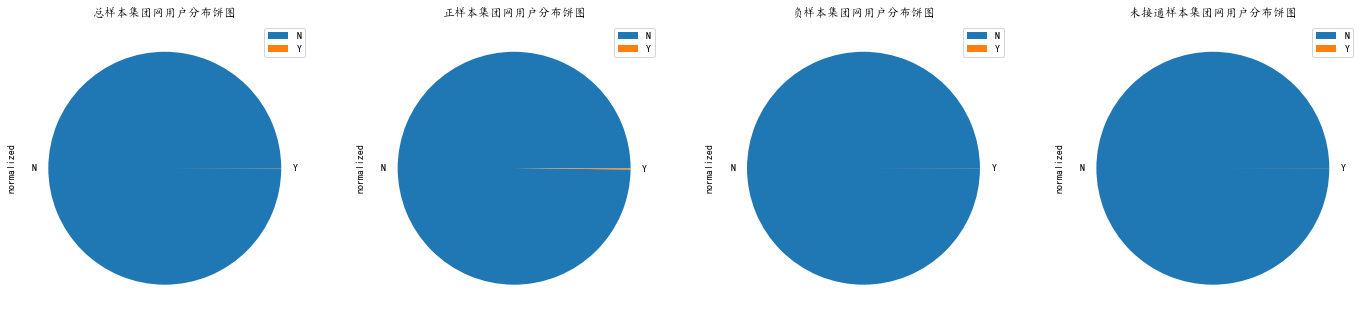

In [52]:
all_if_group.plot.pie(y="normalized", title='总样本集团网用户分布饼图', ax=axes[0])
y_if_group.plot.pie(y="normalized", title='正样本集团网用户分布饼图', ax=axes[1])
n_if_group.plot.pie(y="normalized", title='负样本集团网用户分布饼图', ax=axes[2])
x_if_group.plot.pie(y="normalized", title='未接通样本集团网用户分布饼图', ax=axes[3])
fig

正样本中非集团用户比例相比于总样本有所增大，具有分析价值。

# 对IF_SCHOOL的统计分析

In [53]:
all_if_school = compulete_count_normalized_categories(df_all.IF_SCHOOL)
y_if_school = compulete_count_normalized_categories(df_Y.IF_SCHOOL)
n_if_school = compulete_count_normalized_categories(df_N.IF_SCHOOL)
x_if_school = compulete_count_normalized_categories(df_X.IF_SCHOOL)

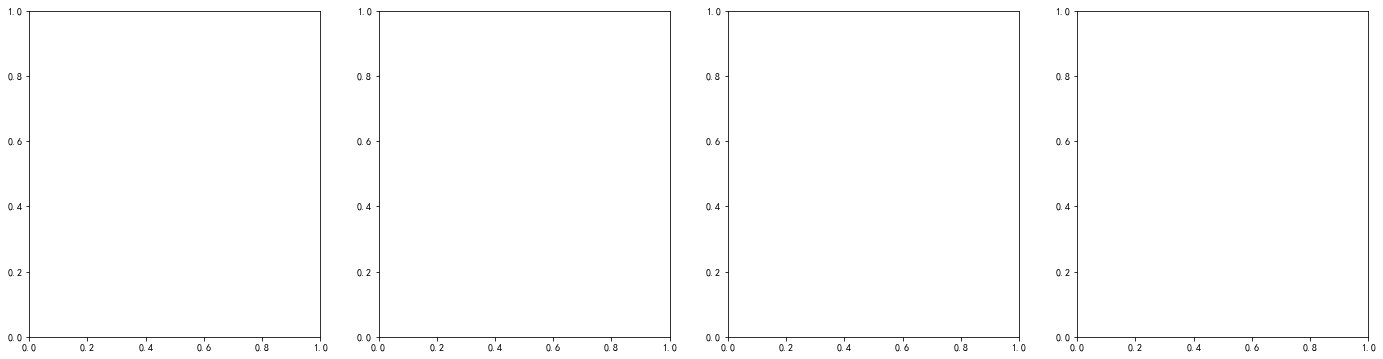

In [54]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6))

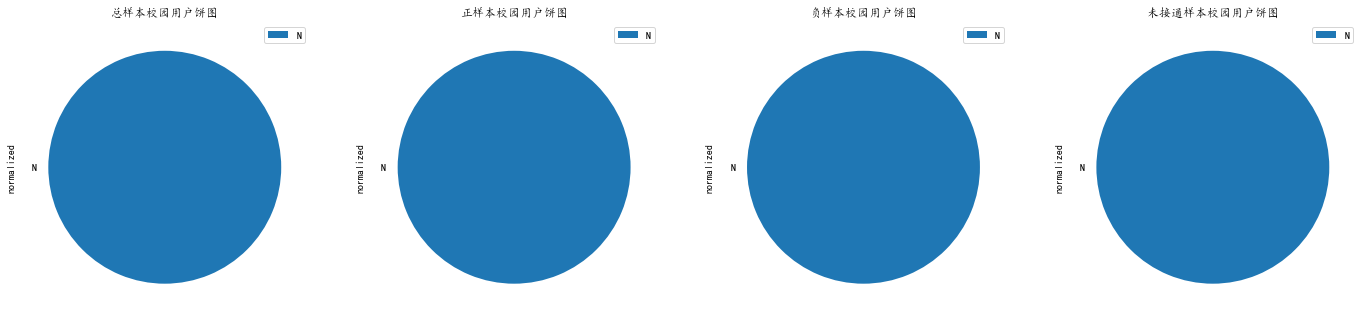

In [55]:
all_if_school.plot.pie(y="normalized", title='总样本校园用户饼图', ax=axes[0])
y_if_school.plot.pie(y="normalized", title='正样本校园用户饼图', ax=axes[1])
n_if_school.plot.pie(y="normalized", title='负样本校园用户饼图', ax=axes[2])
x_if_school.plot.pie(y="normalized", title='未接通样本校园用户饼图', ax=axes[3])
fig

# 对IF_BRD的统计分析

In [56]:
all_if_brd = compulete_count_normalized_categories(df_all.IF_BRD)
y_if_brd = compulete_count_normalized_categories(df_Y.IF_BRD)
n_if_brd = compulete_count_normalized_categories(df_N.IF_BRD)
x_if_brd = compulete_count_normalized_categories(df_X.IF_BRD)

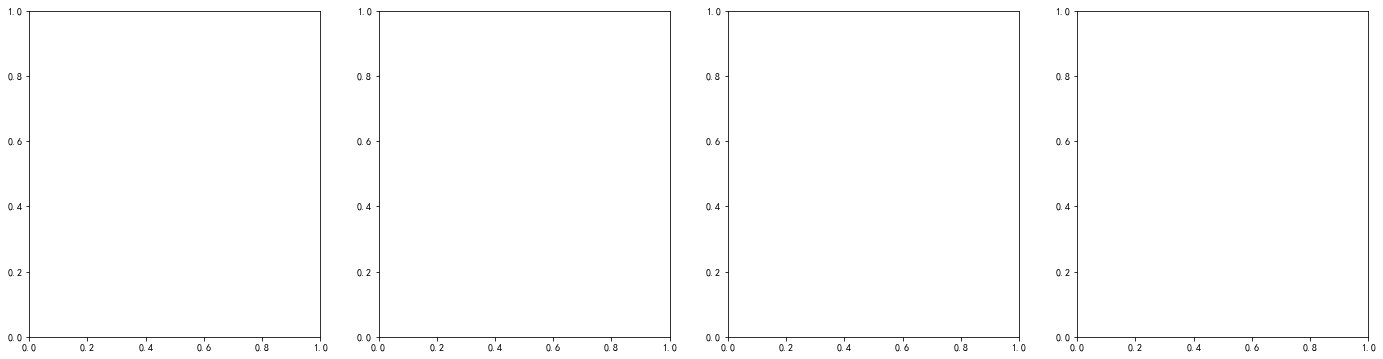

In [57]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6))

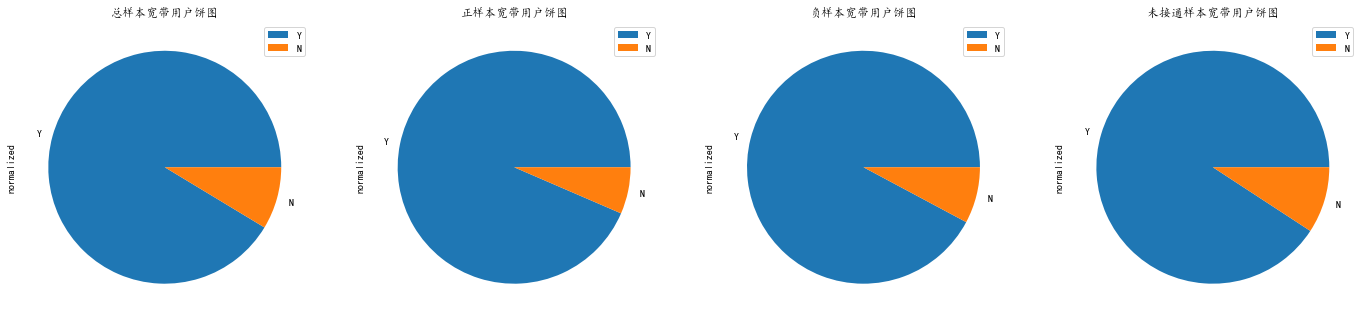

In [58]:
all_if_brd.plot.pie(y="normalized", title='总样本宽带用户饼图', ax=axes[0])
y_if_brd.plot.pie(y="normalized", title='正样本宽带用户饼图', ax=axes[1])
n_if_brd.plot.pie(y="normalized", title='负样本宽带用户饼图', ax=axes[2])
x_if_brd.plot.pie(y="normalized", title='未接通样本宽带用户饼图', ax=axes[3])
fig

# 对BRD_RAX的统计分析

In [59]:
all_brd_rax = compulete_count_normalized(df_all.BRD_RAX, 0, 600, 30)
y_brd_rax = compulete_count_normalized(df_Y.BRD_RAX, 0, 600, 30)
n_brd_rax = compulete_count_normalized(df_N.BRD_RAX, 0, 600, 30)
x_brd_rax = compulete_count_normalized(df_X.BRD_RAX, 0, 600, 30)

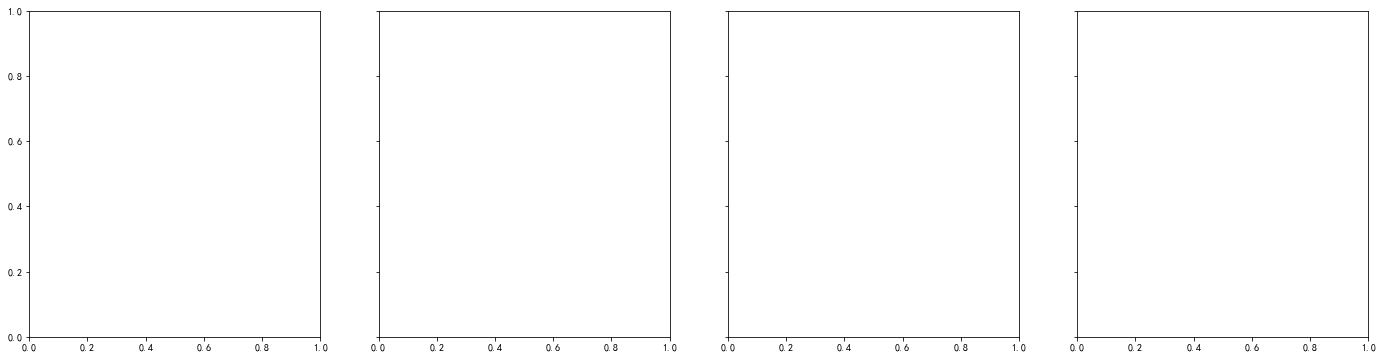

In [60]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

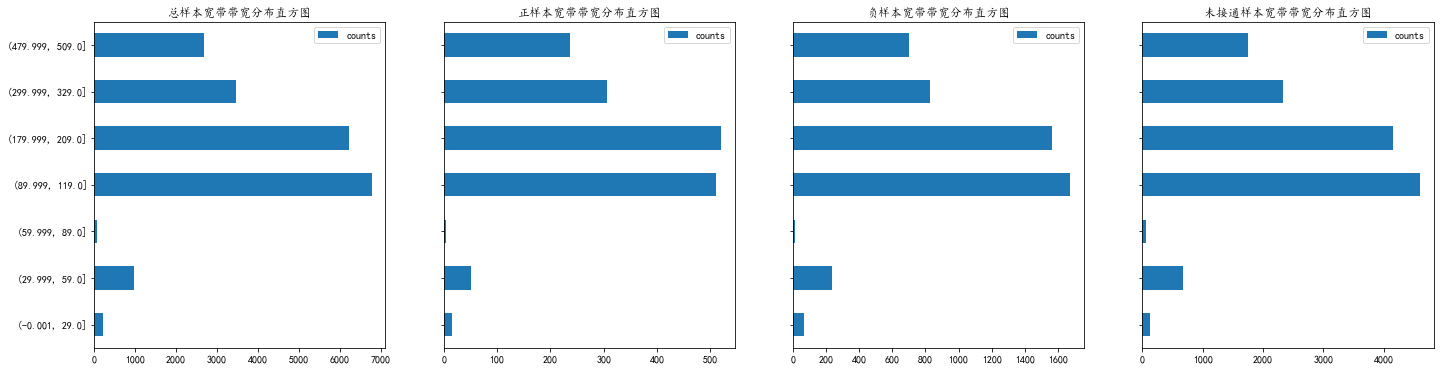

In [61]:
all_brd_rax.plot.barh(y="counts", title='总样本宽带带宽分布直方图', ax=axes[0])
y_brd_rax.plot.barh(y="counts", title='正样本宽带带宽分布直方图', ax=axes[1])
n_brd_rax.plot.barh(y="counts", title='负样本宽带带宽分布直方图', ax=axes[2])
x_brd_rax.plot.barh(y="counts", title='未接通样本宽带带宽分布直方图', ax=axes[3])
fig

# 对BRD_ACTIVE_DAYS的统计分析

In [62]:
all_brd_active_days = compulete_count_normalized(df_all.BRD_ACTIVE_DAYS, 0, 36, 5)
y_brd_active_days = compulete_count_normalized(df_Y.BRD_ACTIVE_DAYS, 0, 36, 5)
n_brd_active_days = compulete_count_normalized(df_N.BRD_ACTIVE_DAYS, 0, 36, 5)
x_brd_active_days = compulete_count_normalized(df_X.BRD_ACTIVE_DAYS, 0, 36, 5)

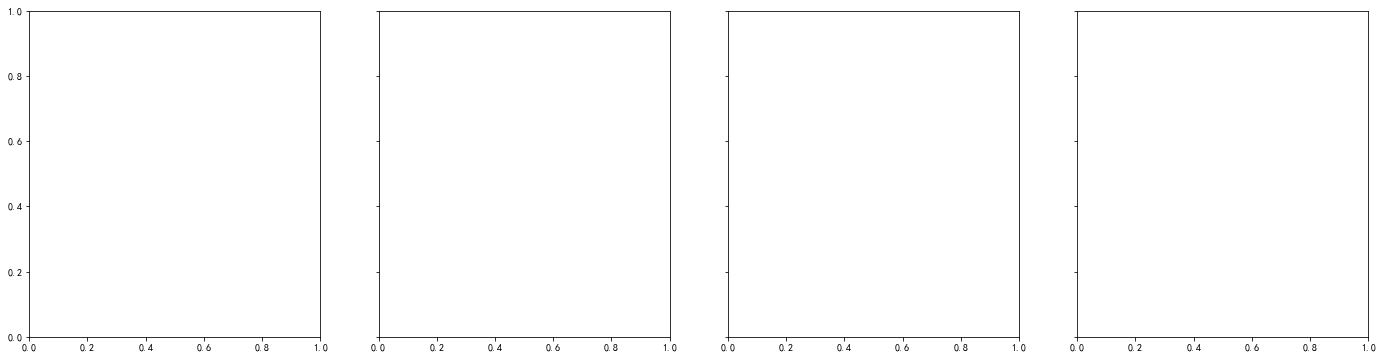

In [63]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

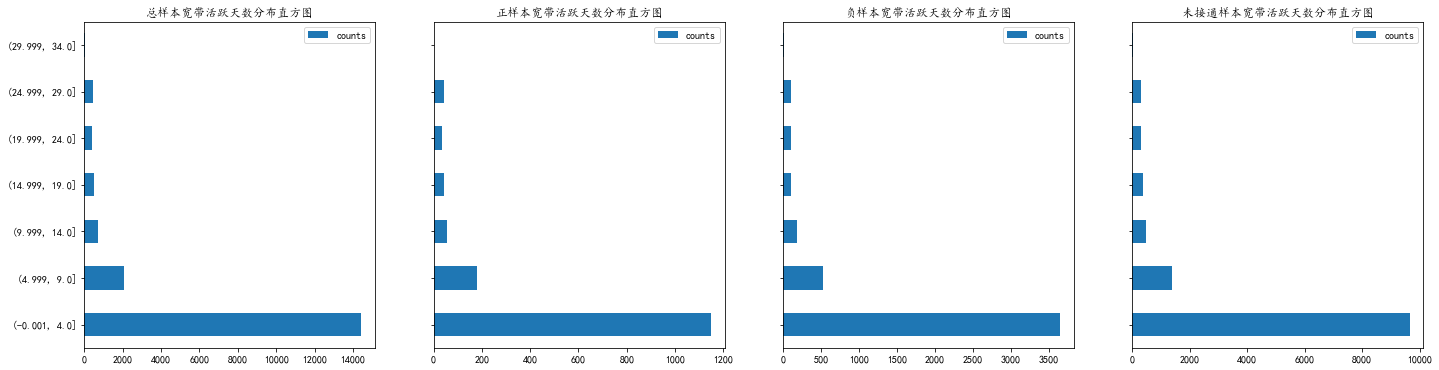

In [64]:
all_brd_active_days.plot.barh(y="counts", title='总样本宽带活跃天数分布直方图', ax=axes[0])
y_brd_active_days.plot.barh(y="counts", title='正样本宽带活跃天数分布直方图', ax=axes[1])
n_brd_active_days.plot.barh(y="counts", title='负样本宽带活跃天数分布直方图', ax=axes[2])
x_brd_active_days.plot.barh(y="counts", title='未接通样本宽带活跃天数分布直方图', ax=axes[3])
fig

总样本数据采集不均衡，月宽带活跃天数在5天以下的占比重较大

# 对IF_ITV的统计分析

In [65]:
all_if_ITV = compulete_count_normalized_categories(df_all.IF_ITV)
y_if_ITV = compulete_count_normalized_categories(df_Y.IF_ITV)
n_if_ITV = compulete_count_normalized_categories(df_N.IF_ITV)
x_if_ITV = compulete_count_normalized_categories(df_X.IF_ITV)

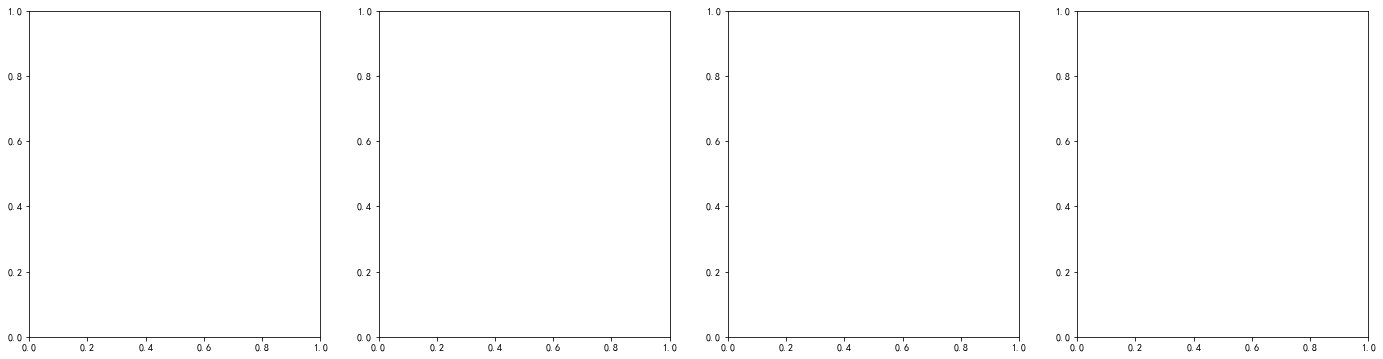

In [66]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6))

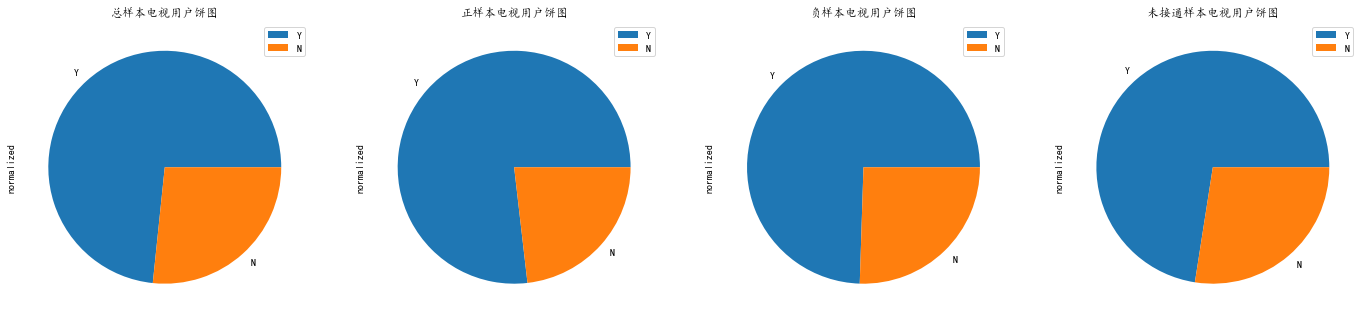

In [67]:
all_if_ITV.plot.pie(y="normalized", title='总样本电视用户饼图', ax=axes[0])
y_if_ITV.plot.pie(y="normalized", title='正样本电视用户饼图', ax=axes[1])
n_if_ITV.plot.pie(y="normalized", title='负样本电视用户饼图', ax=axes[2])
x_if_ITV.plot.pie(y="normalized", title='未接通样本电视用户饼图', ax=axes[3])
fig

该特征具有分析价值。

# 对IF_DBL_TRMNL的统计分析

In [69]:
all_if_dbl_tamnl = compulete_count_normalized_categories(df_all.IF_DBL_TRMNL)
y_if_dbl_tamnl = compulete_count_normalized_categories(df_Y.IF_DBL_TRMNL)
n_if_dbl_tamnl = compulete_count_normalized_categories(df_N.IF_DBL_TRMNL)
x_if_dbl_tamnl = compulete_count_normalized_categories(df_X.IF_DBL_TRMNL)

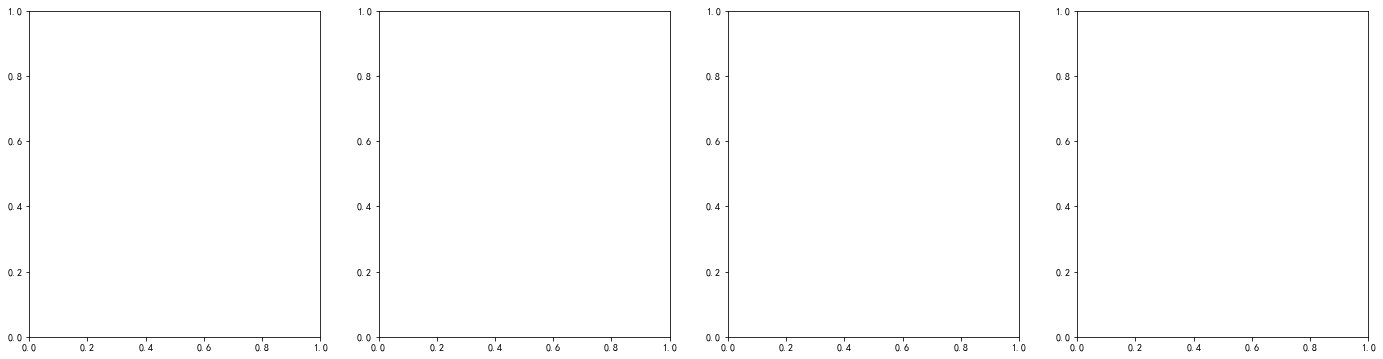

In [70]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6))

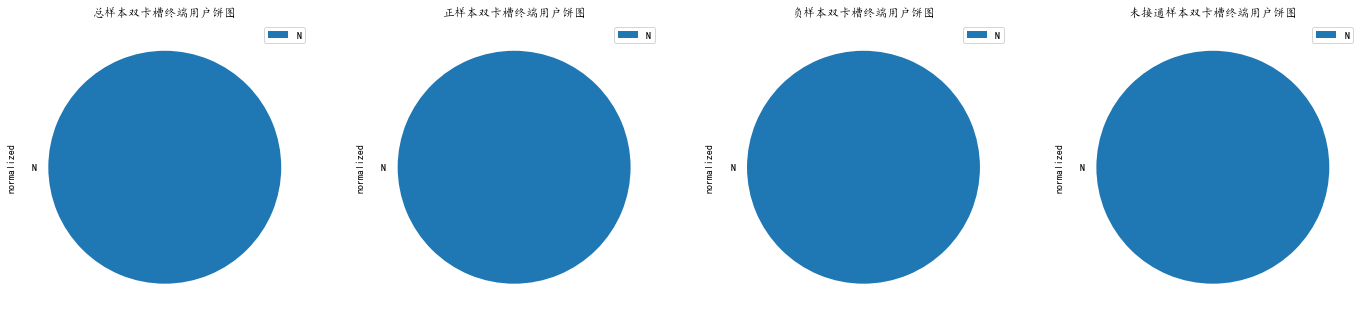

In [71]:
all_if_dbl_tamnl.plot.pie(y="normalized", title='总样本双卡槽终端用户饼图', ax=axes[0])
y_if_dbl_tamnl.plot.pie(y="normalized", title='正样本双卡槽终端用户饼图', ax=axes[1])
n_if_dbl_tamnl.plot.pie(y="normalized", title='负样本双卡槽终端用户饼图', ax=axes[2])
x_if_dbl_tamnl.plot.pie(y="normalized", title='未接通样本双卡槽终端用户饼图', ax=axes[3])
fig

# 对IF_4G_TRMNL的统计分析

In [72]:
all_if_4g_trmnl = compulete_count_normalized_categories(df_all.IF_4G_TRMNL)
y_if_4g_trmnl = compulete_count_normalized_categories(df_Y.IF_4G_TRMNL)
n_if_4g_trmnl = compulete_count_normalized_categories(df_N.IF_4G_TRMNL)
x_if_4g_trmnl = compulete_count_normalized_categories(df_X.IF_4G_TRMNL)

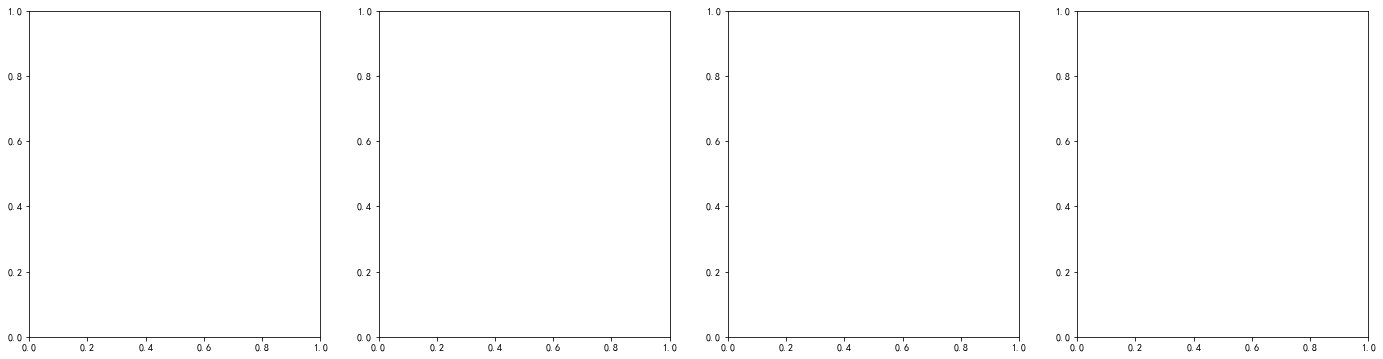

In [73]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6))

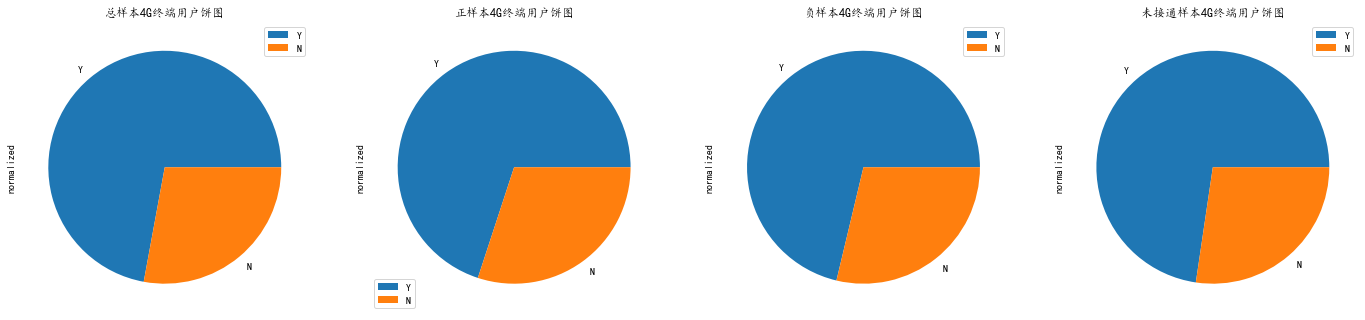

In [74]:
all_if_4g_trmnl.plot.pie(y="normalized", title='总样本4G终端用户饼图', ax=axes[0])
y_if_4g_trmnl.plot.pie(y="normalized", title='正样本4G终端用户饼图', ax=axes[1])
n_if_4g_trmnl.plot.pie(y="normalized", title='负样本4G终端用户饼图', ax=axes[2])
x_if_4g_trmnl.plot.pie(y="normalized", title='未接通样本4G终端用户饼图', ax=axes[3])
fig

总样本与正样本分布比例相近，该特征参考价值不大

# 对TRMNL_AGE的统计分析

In [75]:
all_trmnl_age = compulete_count_normalized(df_all.TRMNL_AGE, 0, 30, 3)
y_trmnl_age = compulete_count_normalized(df_Y.TRMNL_AGE, 0, 30, 3)
n_trmnl_age = compulete_count_normalized(df_N.TRMNL_AGE, 0, 30, 3)
x_trmnl_age = compulete_count_normalized(df_X.TRMNL_AGE, 0, 30, 3)

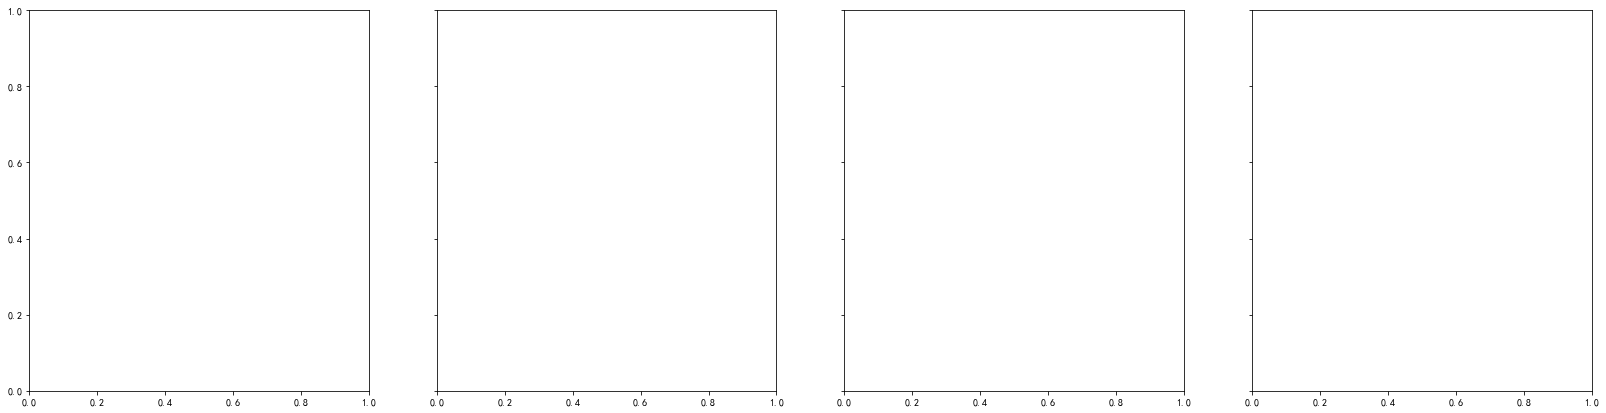

In [76]:
fig,axes = plt.subplots(1, 4, figsize=(28, 7), sharey=True)

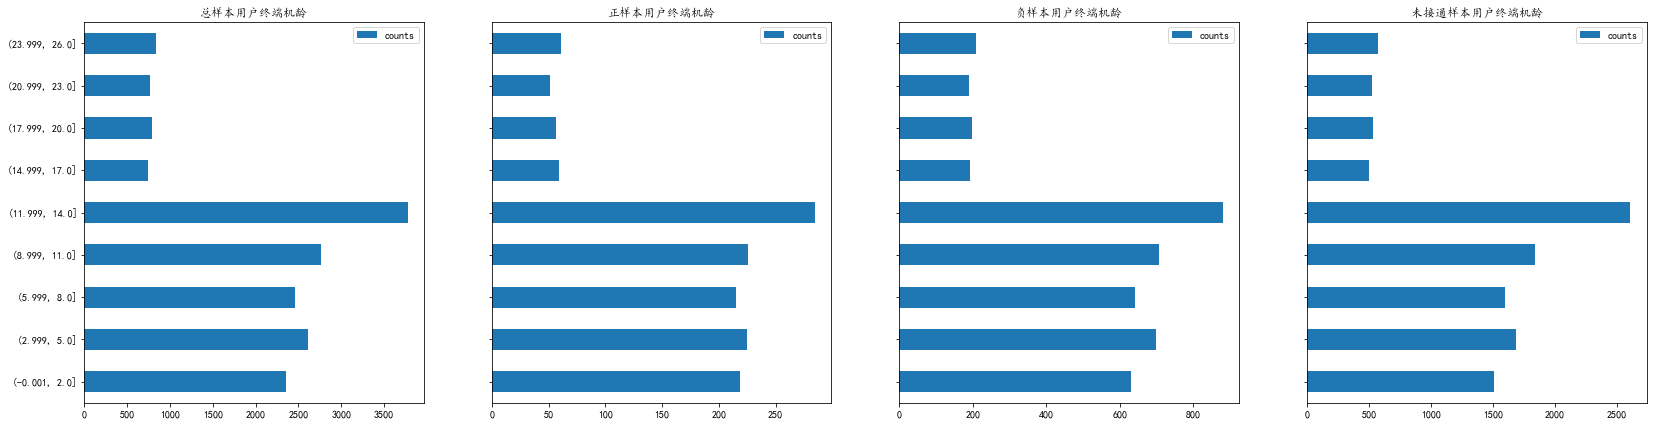

In [77]:
all_trmnl_age.plot.barh(y="counts", title='总样本用户终端机龄', ax=axes[0])
y_trmnl_age.plot.barh(y="counts", title='正样本用户终端机龄', ax=axes[1])
n_trmnl_age.plot.barh(y="counts", title='负样本用户终端机龄', ax=axes[2])
x_trmnl_age.plot.barh(y="counts", title='未接通样本用户终端机龄', ax=axes[3])
fig

总样本与正样本分布比例相近

# 对IF_VOLTE的统计分析

In [78]:
all_if_volte = compulete_count_normalized_categories(df_all.IF_VOLTE)
y_if_volte = compulete_count_normalized_categories(df_Y.IF_VOLTE)
n_if_volte = compulete_count_normalized_categories(df_N.IF_VOLTE)
x_if_volte = compulete_count_normalized_categories(df_X.IF_VOLTE)

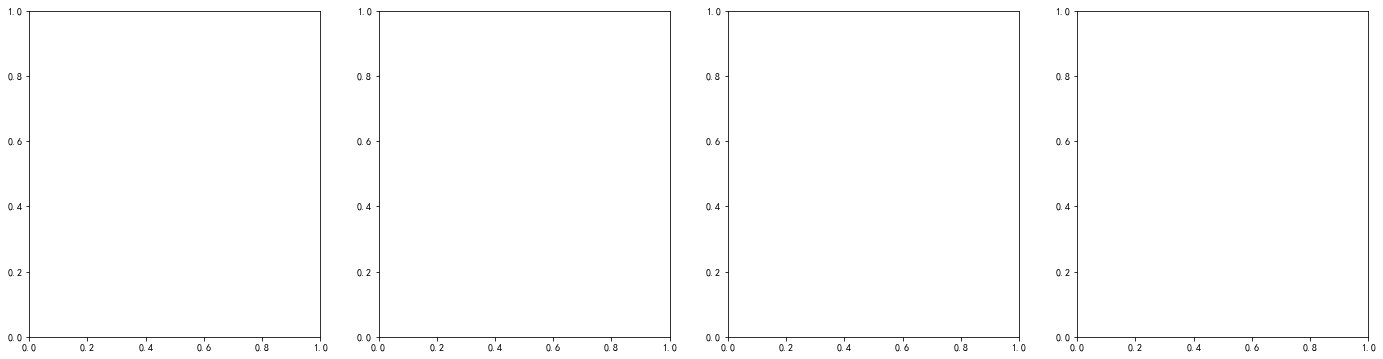

In [79]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6))

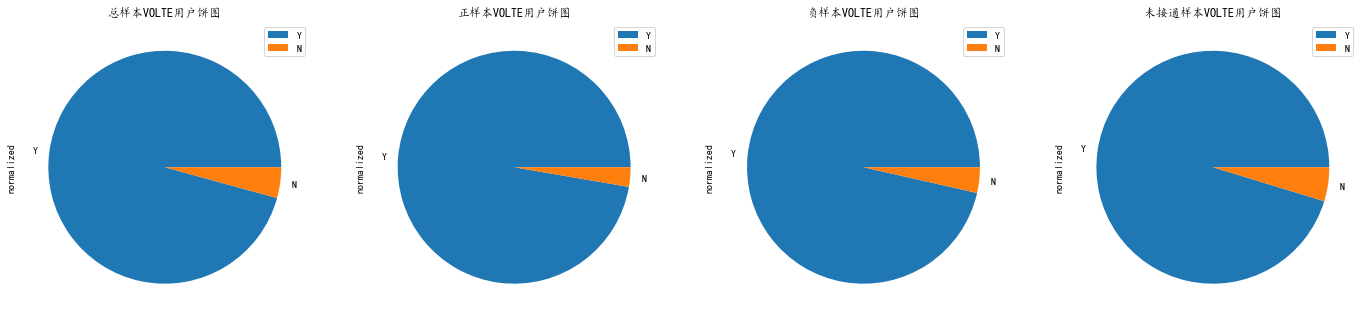

In [80]:
all_if_volte.plot.pie(y="normalized", title='总样本VOLTE用户饼图', ax=axes[0])
y_if_volte.plot.pie(y="normalized", title='正样本VOLTE用户饼图', ax=axes[1])
n_if_volte.plot.pie(y="normalized", title='负样本VOLTE用户饼图', ax=axes[2])
x_if_volte.plot.pie(y="normalized", title='未接通样本VOLTE用户饼图', ax=axes[3])
fig

总样本与正样本分布比例相近

# 对BRD_ACTIVE_DAYS的统计分析

In [81]:
all_brd_active_days = compulete_count_normalized(df_all.BRD_ACTIVE_DAYS, 0, 40, 5)
y_brd_active_days = compulete_count_normalized(df_Y.BRD_ACTIVE_DAYS, 0, 40, 5)
n_brd_active_days = compulete_count_normalized(df_N.BRD_ACTIVE_DAYS, 0, 40, 5)
x_brd_active_days = compulete_count_normalized(df_X.BRD_ACTIVE_DAYS, 0, 40, 5)

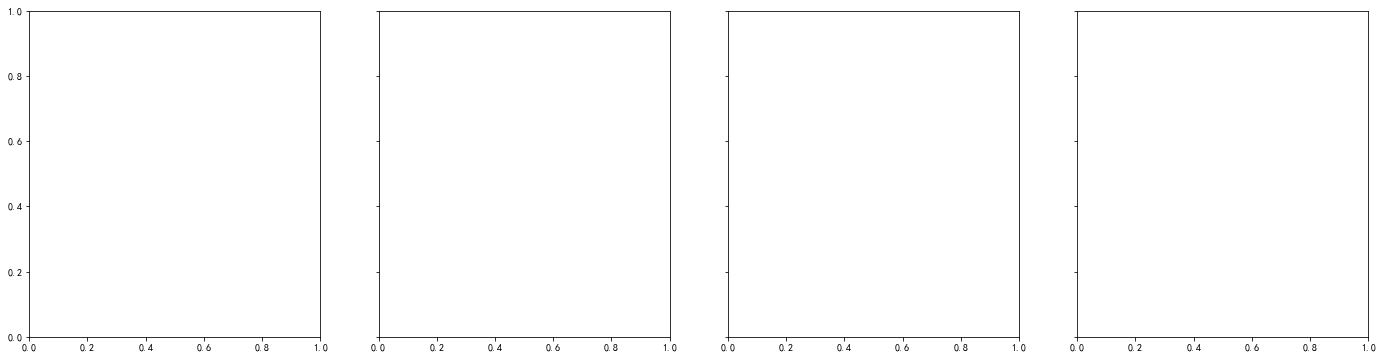

In [82]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

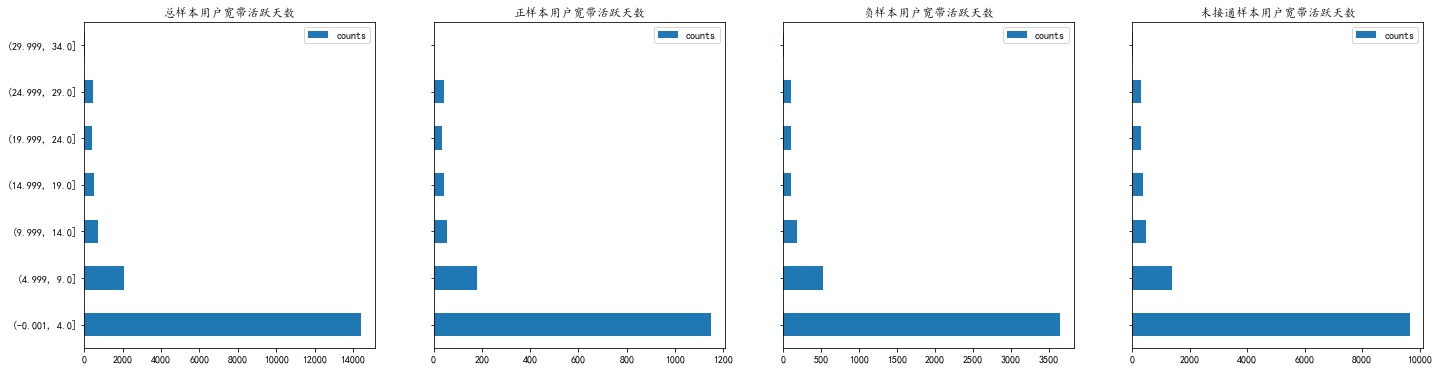

In [83]:
all_brd_active_days.plot.barh(y="counts", title='总样本用户宽带活跃天数', ax=axes[0])
y_brd_active_days.plot.barh(y="counts", title='正样本用户宽带活跃天数', ax=axes[1])
n_brd_active_days.plot.barh(y="counts", title='负样本用户宽带活跃天数', ax=axes[2])
x_brd_active_days.plot.barh(y="counts", title='未接通样本用户宽带活跃天数', ax=axes[3])
fig

总样本和正样本用户的宽带活跃天数都集中在四天内

# 对CHRG的统计分析

In [84]:
df_all.CHRG.max()

722.72

In [88]:
all_chrg = compulete_count_normalized(df_all.CHRG, 0, 50, 5)
y_chrg = compulete_count_normalized(df_Y.CHRG, 0, 50, 5)
n_chrg = compulete_count_normalized(df_N.CHRG, 0, 50, 5)
x_chrg = compulete_count_normalized(df_X.CHRG, 0, 50, 5)

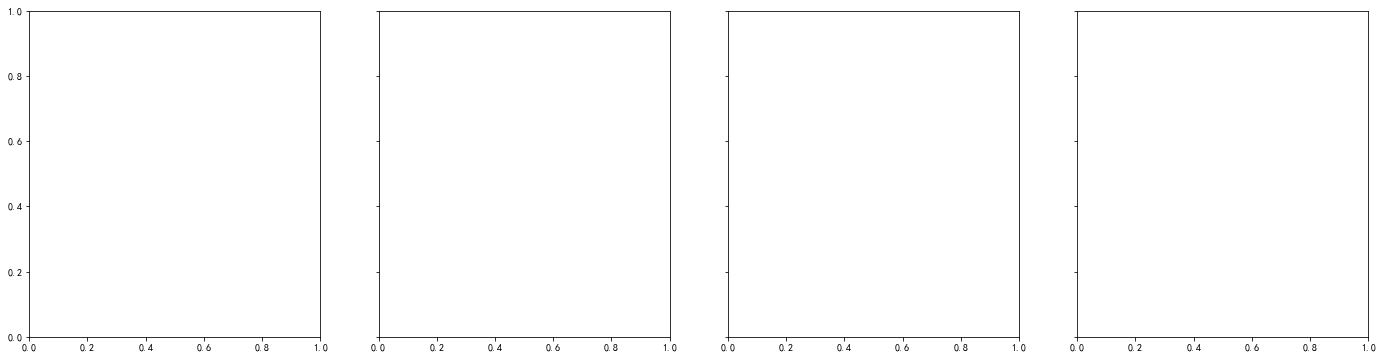

In [89]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

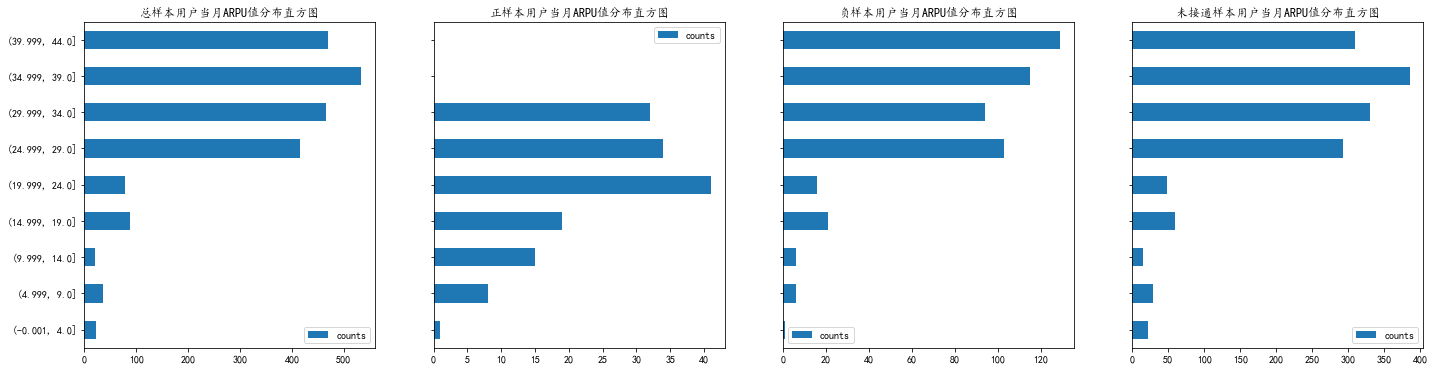

In [90]:
all_chrg.plot.barh(y="counts", title='总样本用户当月ARPU值分布直方图', ax=axes[0])
y_chrg.plot.barh(y="counts", title='正样本用户当月ARPU值分布直方图', ax=axes[1])
n_chrg.plot.barh(y="counts", title='负样本用户当月ARPU值分布直方图', ax=axes[2])
x_chrg.plot.barh(y="counts", title='未接通样本用户当月ARPU值分布直方图', ax=axes[3])
fig

# DATA_FLOW_AMNT

In [91]:
all_data_flow_amnt = compulete_count_normalized(df_all.DATA_FLOW_AMNT, 0, 100000,5000, '当月')
y_data_flow_amnt = compulete_count_normalized(df_Y.DATA_FLOW_AMNT, 0, 100000,5000, '当月')
n_data_flow_amnt = compulete_count_normalized(df_N.DATA_FLOW_AMNT, 0, 100000,5000, '当月')
x_data_flow_amnt = compulete_count_normalized(df_X.DATA_FLOW_AMNT, 0, 100000,5000, '当月')

all_data_flow_amnt01 = compulete_count_normalized(df_all.DATA_FLOW_AMNT01, 0, 100000,5000, '上月')
y_data_flow_amnt01 = compulete_count_normalized(df_Y.DATA_FLOW_AMNT01, 0, 100000,5000, '上月')
n_data_flow_amnt01 = compulete_count_normalized(df_N.DATA_FLOW_AMNT01, 0, 100000,5000, '上月')
x_data_flow_amnt01 = compulete_count_normalized(df_X.DATA_FLOW_AMNT01, 0, 100000,5000, '上月')

all_data_flow_amnt02 = compulete_count_normalized(df_all.DATA_FLOW_AMNT02, 0, 100000,5000, '上上月')
y_data_flow_amnt02 = compulete_count_normalized(df_Y.DATA_FLOW_AMNT02, 0, 100000,5000, '上上月')
n_data_flow_amnt02 = compulete_count_normalized(df_N.DATA_FLOW_AMNT02, 0, 100000,5000, '上上月')
x_data_flow_amnt02 = compulete_count_normalized(df_X.DATA_FLOW_AMNT02, 0, 100000,5000, '上上月')

In [92]:
concat_all_data_flow_amnt = pd.concat([all_data_flow_amnt.当月, all_data_flow_amnt01.上月, all_data_flow_amnt02.上上月] ,axis=1)
concat_all_data_flow_amnt = concat_all_data_flow_amnt.reindex([(x.right+1) for x in concat_all_data_flow_amnt.index])

concat_y_data_flow_amnt = pd.concat([y_data_flow_amnt.当月, y_data_flow_amnt01.上月, y_data_flow_amnt02.上上月] ,axis=1)
concat_y_data_flow_amnt = concat_y_data_flow_amnt.reindex([(x.right+1) for x in concat_y_data_flow_amnt.index])

concat_n_data_flow_amnt = pd.concat([n_data_flow_amnt.当月, n_data_flow_amnt01.上月, n_data_flow_amnt02.上上月] ,axis=1)
concat_n_data_flow_amnt = concat_n_data_flow_amnt.reindex([(x.right+1) for x in concat_n_data_flow_amnt.index])

concat_x_data_flow_amnt = pd.concat([x_data_flow_amnt.当月, x_data_flow_amnt01.上月, x_data_flow_amnt02.上上月] ,axis=1)
concat_x_data_flow_amnt = concat_x_data_flow_amnt.reindex([(x.right+1) for x in concat_x_data_flow_amnt.index])

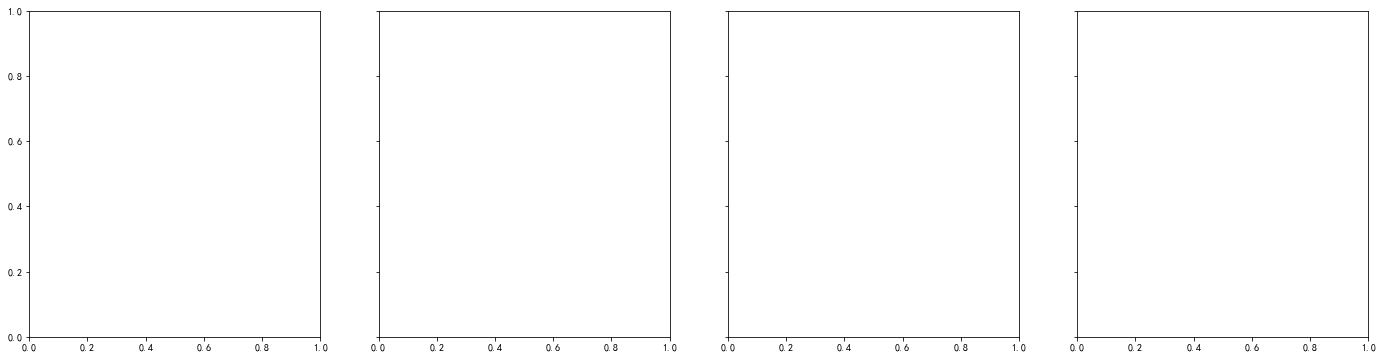

In [93]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

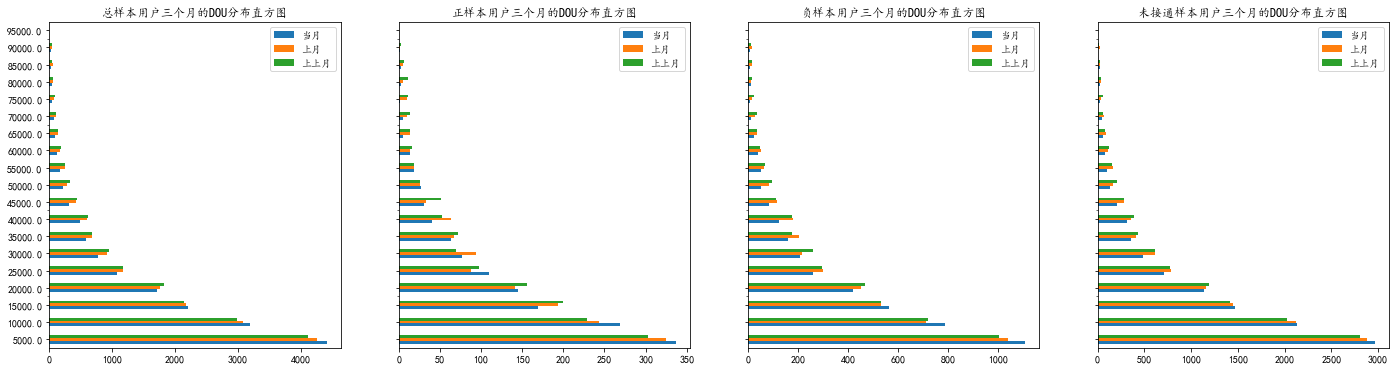

In [94]:
concat_all_data_flow_amnt.plot.barh(legend=True, title='总样本用户三个月的DOU分布直方图', ax=axes[0])
concat_y_data_flow_amnt.plot.barh(legend=True, title='正样本用户三个月的DOU分布直方图', ax=axes[1])
concat_n_data_flow_amnt.plot.barh(legend=True, title='负样本用户三个月的DOU分布直方图', ax=axes[2])
concat_x_data_flow_amnt.plot.barh(legend=True, title='未接通样本用户三个月的DOU分布直方图', ax=axes[3])
fig

# 对CALL_DRTN的统计分析

In [95]:
all_call_drtn = compulete_count_normalized(df_all.CALL_DRTN, 0,2000,100, '当月')
y_call_drtn = compulete_count_normalized(df_Y.CALL_DRTN, 0, 2000,100, '当月')
n_call_drtn = compulete_count_normalized(df_N.CALL_DRTN, 0, 2000,100, '当月')
x_call_drtn = compulete_count_normalized(df_X.CALL_DRTN, 0, 2000,100, '当月')

all_call_drtn01 = compulete_count_normalized(df_all.CALL_DRTN01, 0,2000,100, '上月')
y_call_drtn01 = compulete_count_normalized(df_Y.CALL_DRTN01, 0, 2000,100, '上月')
n_call_drtn01 = compulete_count_normalized(df_N.CALL_DRTN01, 0, 2000,100, '上月')
x_call_drtn01 = compulete_count_normalized(df_X.CALL_DRTN01, 0, 2000,100, '上月')

all_call_drtn02 = compulete_count_normalized(df_all.CALL_DRTN02, 0,2000,100, '上上月')
y_call_drtn02 = compulete_count_normalized(df_Y.CALL_DRTN02, 0, 2000,100, '上上月')
n_call_drtn02 = compulete_count_normalized(df_N.CALL_DRTN02, 0, 2000,100, '上上月')
x_call_drtn02 = compulete_count_normalized(df_X.CALL_DRTN02, 0, 2000,100, '上上月')

In [96]:
concat_all_call_drtn = pd.concat([all_call_drtn.当月, all_call_drtn01.上月, all_call_drtn02.上上月] ,axis=1)
concat_all_call_drtn = concat_all_call_drtn.reindex([(x.right+1) for x in concat_all_call_drtn.index])

concat_y_call_drtn = pd.concat([y_call_drtn.当月, y_call_drtn01.上月, y_call_drtn02.上上月] ,axis=1)
concat_y_call_drtn = concat_y_call_drtn.reindex([(x.right+1) for x in concat_y_call_drtn.index])

concat_n_call_drtn = pd.concat([n_call_drtn.当月, n_call_drtn01.上月, n_call_drtn02.上上月] ,axis=1)
concat_n_call_drtn = concat_n_call_drtn.reindex([(x.right+1) for x in concat_n_call_drtn.index])

concat_x_call_drtn = pd.concat([x_call_drtn.当月, x_call_drtn01.上月, x_call_drtn02.上上月] ,axis=1)
concat_x_call_drtn = concat_x_call_drtn.reindex([(x.right+1) for x in concat_x_call_drtn.index])

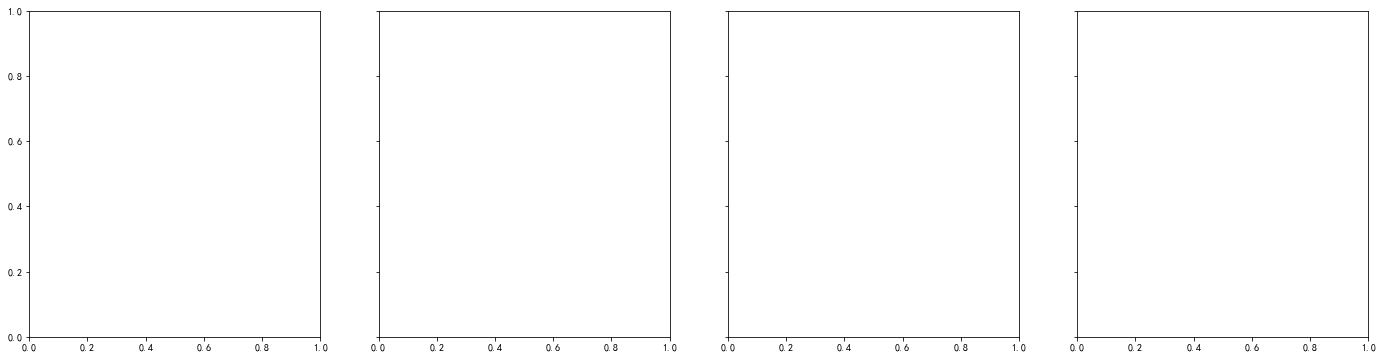

In [97]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

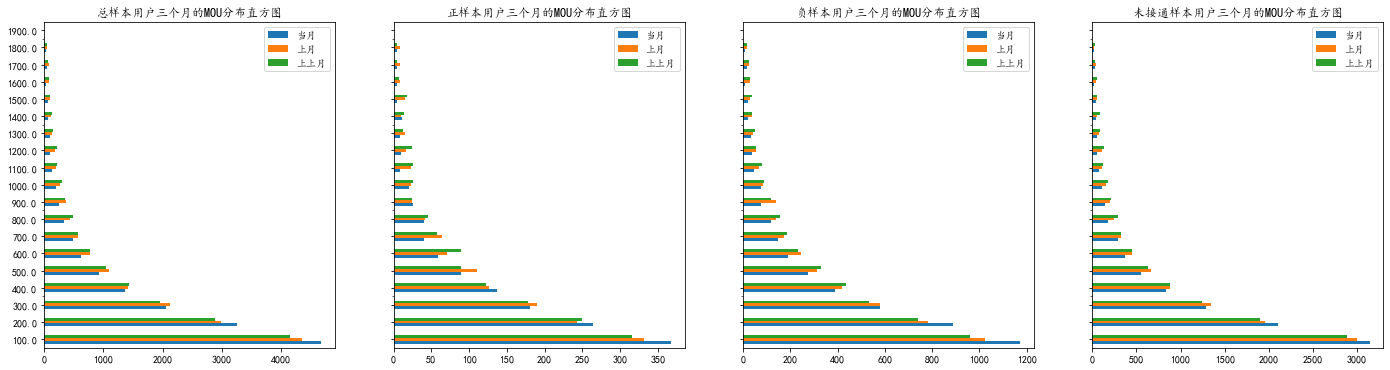

In [98]:
concat_all_call_drtn.plot.barh(legend=True, title='总样本用户三个月的MOU分布直方图', ax=axes[0])
concat_y_call_drtn.plot.barh(legend=True, title='正样本用户三个月的MOU分布直方图', ax=axes[1])
concat_n_call_drtn.plot.barh(legend=True, title='负样本用户三个月的MOU分布直方图', ax=axes[2])
concat_x_call_drtn.plot.barh(legend=True, title='未接通样本用户三个月的MOU分布直方图', ax=axes[3])
fig

# 对DATA_FLOW_AMNT_PRV的统计分析

In [105]:
all_data_flow_amnt_prv = compulete_count_normalized(df_all.DATA_FLOW_AMNT_PRV, 0,2000,100)
y_data_flow_amnt_prv = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_PRV, 0, 2000,100)
n_data_flow_amnt_prv = compulete_count_normalized(df_N.DATA_FLOW_AMNT_PRV, 0, 2000,100)
x_data_flow_amnt_prv = compulete_count_normalized(df_X.DATA_FLOW_AMNT_PRV, 0, 2000,100)

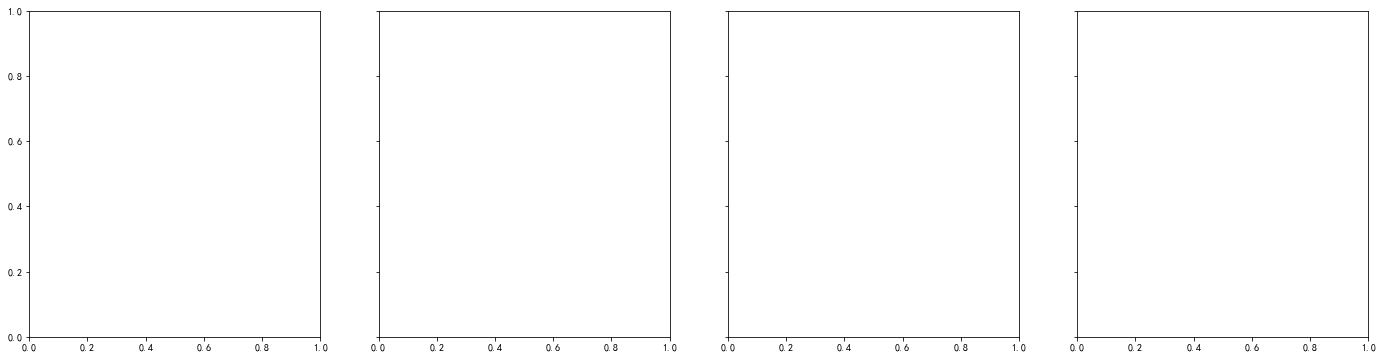

In [106]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

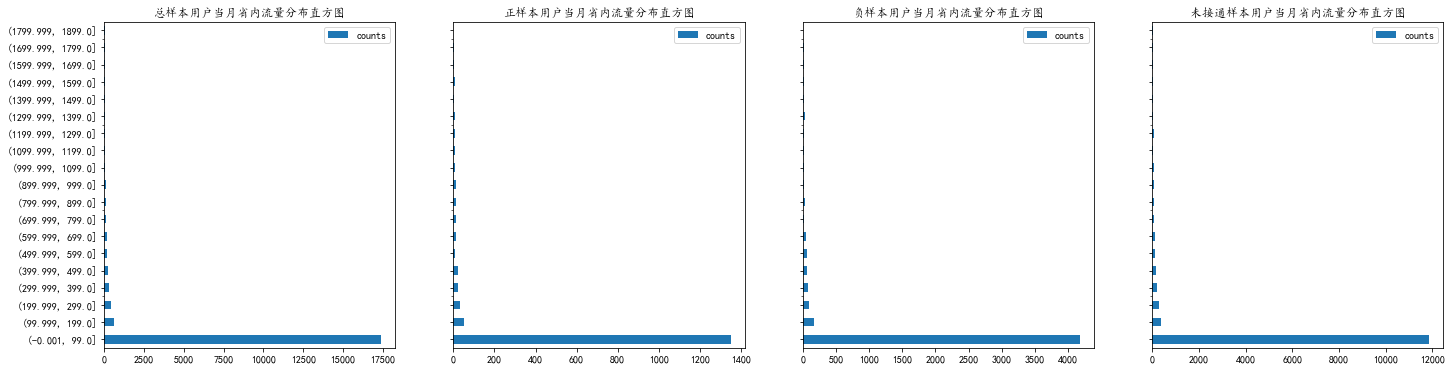

In [107]:
all_data_flow_amnt_prv.plot.barh(y="counts", title='总样本用户当月省内流量分布直方图', ax=axes[0])
y_data_flow_amnt_prv.plot.barh(y="counts", title='正样本用户当月省内流量分布直方图', ax=axes[1])
n_data_flow_amnt_prv.plot.barh(y="counts", title='负样本用户当月省内流量分布直方图', ax=axes[2])
x_data_flow_amnt_prv.plot.barh(y="counts", title='未接通样本用户当月省内流量分布直方图', ax=axes[3])
fig

In [108]:
all_data_flow_amnt_prv = compulete_count_normalized(df_all.DATA_FLOW_AMNT_PRV, 0,100,10)
y_data_flow_amnt_prv = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_PRV, 0, 100,10)
n_data_flow_amnt_prv = compulete_count_normalized(df_N.DATA_FLOW_AMNT_PRV, 0, 100,10)
x_data_flow_amnt_prv = compulete_count_normalized(df_X.DATA_FLOW_AMNT_PRV, 0, 100,10)

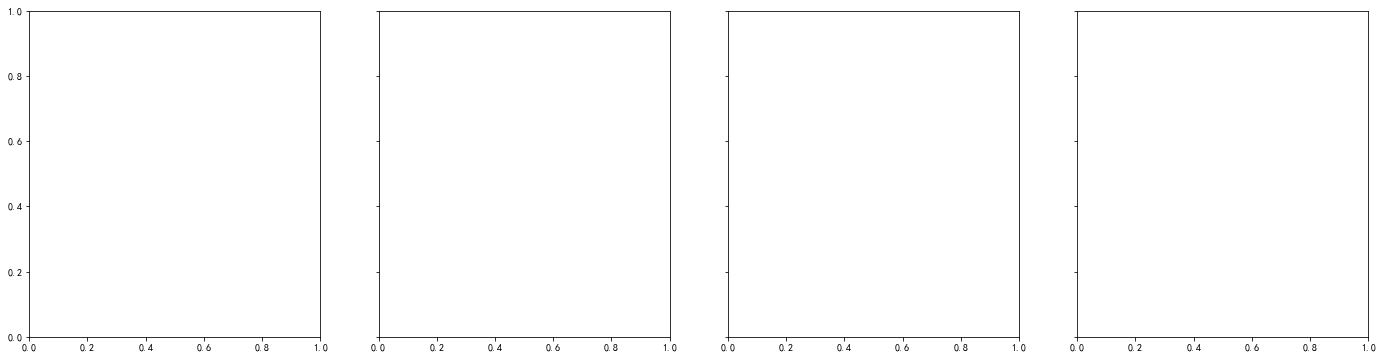

In [109]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

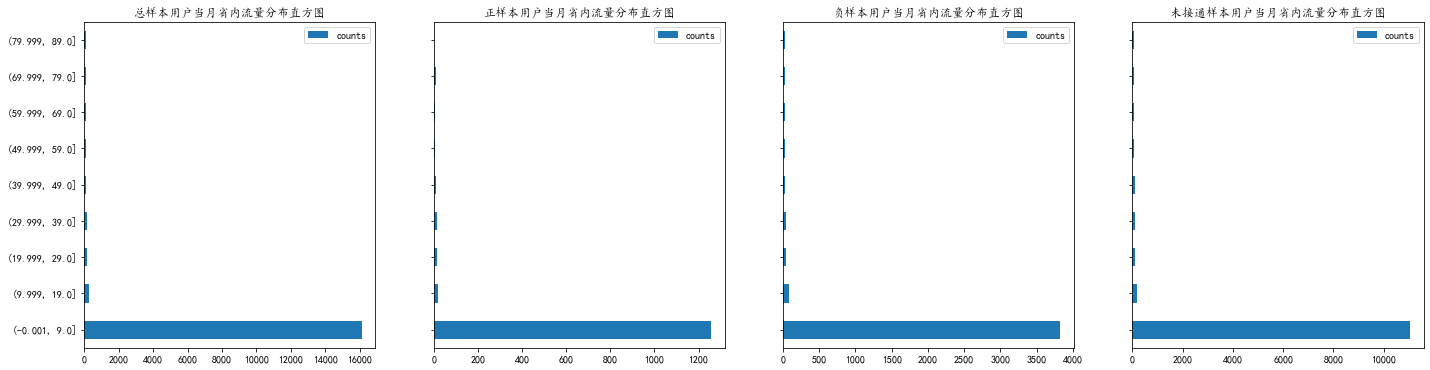

In [110]:
all_data_flow_amnt_prv.plot.barh(y="counts", title='总样本用户当月省内流量分布直方图', ax=axes[0])
y_data_flow_amnt_prv.plot.barh(y="counts", title='正样本用户当月省内流量分布直方图', ax=axes[1])
n_data_flow_amnt_prv.plot.barh(y="counts", title='负样本用户当月省内流量分布直方图', ax=axes[2])
x_data_flow_amnt_prv.plot.barh(y="counts", title='未接通样本用户当月省内流量分布直方图', ax=axes[3])
fig

总样本与正样本的用户当月省内流量都集中在10M内，该流量继续细粒度划分意义不大，该特征分析价值不大

# 对DATA_FLOW_AMNT_ROAM_PRV的统计分析

In [111]:
all_data_flow_amnt_roam_prv = compulete_count_normalized(df_all.DATA_FLOW_AMNT_ROAM_PRV, 0, 10000, 500,'当月')
y_data_flow_amnt_roam_prv = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_ROAM_PRV, 0, 10000, 500,'当月')
n_data_flow_amnt_roam_prv = compulete_count_normalized(df_N.DATA_FLOW_AMNT_ROAM_PRV, 0, 10000, 500,'当月')
x_data_flow_amnt_roam_prv = compulete_count_normalized(df_X.DATA_FLOW_AMNT_ROAM_PRV, 0, 10000, 500,'当月')

all_data_flow_amnt_roam_prv01 = compulete_count_normalized(df_all.DATA_FLOW_AMNT_ROAM_PRV01, 0, 10000, 500,'上月')
y_data_flow_amnt_roam_prv01 = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_ROAM_PRV01, 0, 10000, 500,'上月')
n_data_flow_amnt_roam_prv01 = compulete_count_normalized(df_N.DATA_FLOW_AMNT_ROAM_PRV01, 0, 10000, 500,'上月')
x_data_flow_amnt_roam_prv01 = compulete_count_normalized(df_X.DATA_FLOW_AMNT_ROAM_PRV01, 0, 10000, 500,'上月')

all_data_flow_amnt_roam_prv02 = compulete_count_normalized(df_all.DATA_FLOW_AMNT_ROAM_PRV02, 0, 10000, 500,'上上月')
y_data_flow_amnt_roam_prv02 = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_ROAM_PRV02, 0, 10000, 500,'上上月')
n_data_flow_amnt_roam_prv02 = compulete_count_normalized(df_N.DATA_FLOW_AMNT_ROAM_PRV02, 0, 10000, 500,'上上月')
x_data_flow_amnt_roam_prv02 = compulete_count_normalized(df_X.DATA_FLOW_AMNT_ROAM_PRV02, 0, 10000, 500,'上上月')

In [112]:
concat_all_data_flow_amnt_roam_prv = pd.concat([all_data_flow_amnt_roam_prv.当月, 
                                                all_data_flow_amnt_roam_prv01.上月,
                                                all_data_flow_amnt_roam_prv02.上上月] ,axis=1)
concat_all_data_flow_amnt_roam_prv = concat_all_data_flow_amnt_roam_prv.reindex([(x.right+1) for x in concat_all_data_flow_amnt_roam_prv.index])

concat_y_data_flow_amnt_roam_prv = pd.concat([y_data_flow_amnt_roam_prv.当月, 
                                                y_data_flow_amnt_roam_prv01.上月,
                                                y_data_flow_amnt_roam_prv02.上上月] ,axis=1)
concat_y_data_flow_amnt_roam_prv = concat_y_data_flow_amnt_roam_prv.reindex([(x.right+1) for x in concat_y_data_flow_amnt_roam_prv.index])

concat_n_data_flow_amnt_roam_prv = pd.concat([n_data_flow_amnt_roam_prv.当月, 
                                                n_data_flow_amnt_roam_prv01.上月,
                                                n_data_flow_amnt_roam_prv02.上上月] ,axis=1)
concat_n_data_flow_amnt_roam_prv = concat_n_data_flow_amnt_roam_prv.reindex([(x.right+1) for x in concat_n_data_flow_amnt_roam_prv.index])

concat_x_data_flow_amnt_roam_prv = pd.concat([x_data_flow_amnt_roam_prv.当月, 
                                                x_data_flow_amnt_roam_prv01.上月,
                                                x_data_flow_amnt_roam_prv02.上上月] ,axis=1)
concat_x_data_flow_amnt_roam_prv = concat_x_data_flow_amnt_roam_prv.reindex([(x.right+1) for x in concat_x_data_flow_amnt_roam_prv.index])

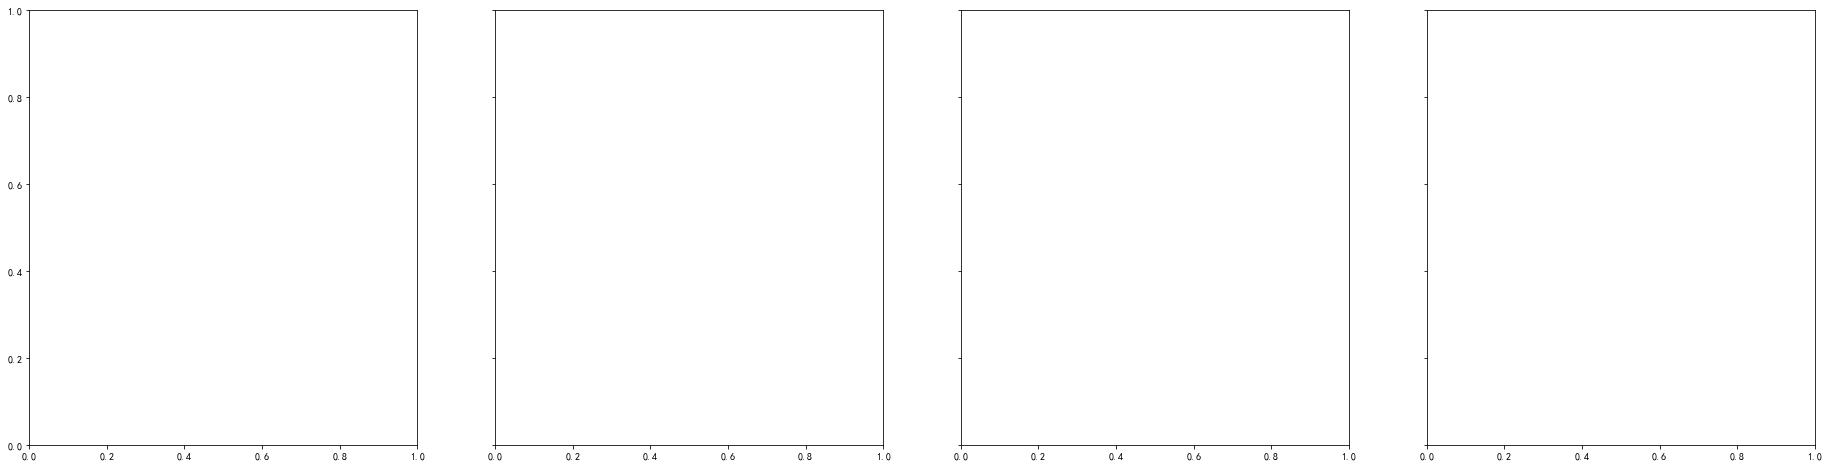

In [113]:
fig,axes = plt.subplots(1, 4, figsize=(32, 8), sharey=True)

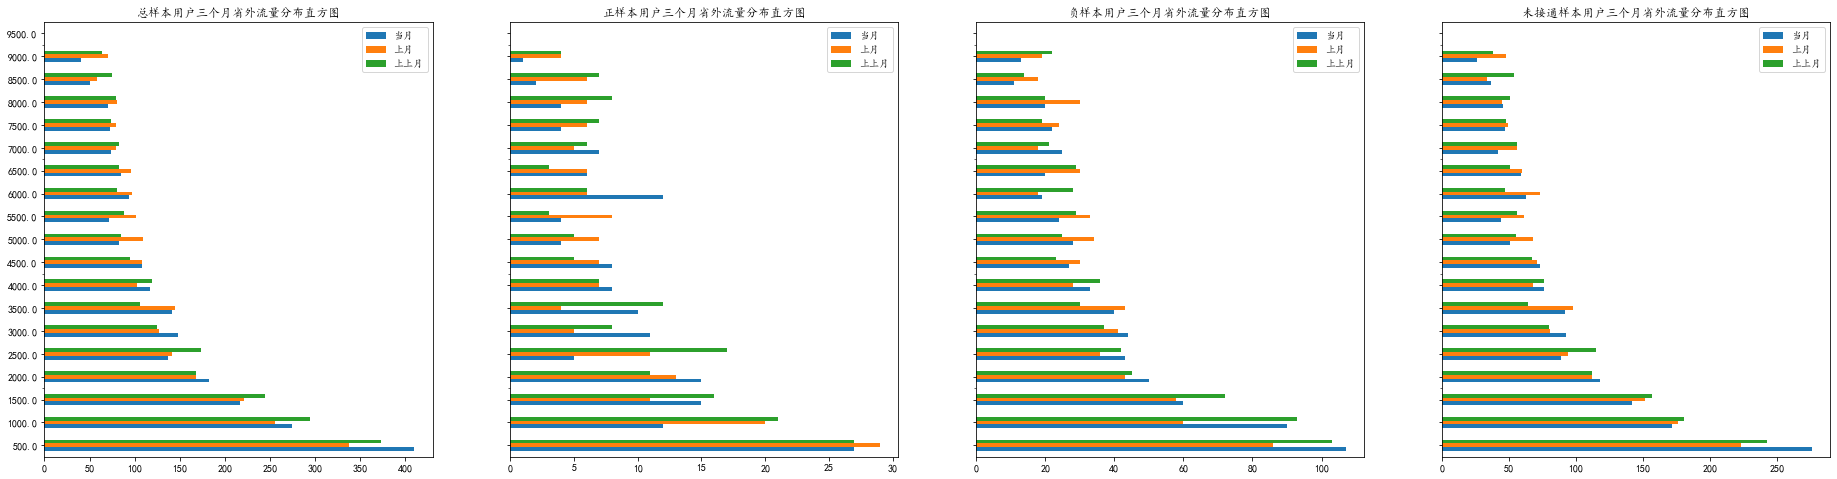

In [114]:
concat_all_data_flow_amnt_roam_prv.plot.barh(legend=True, title='总样本用户三个月省外流量分布直方图',ax=axes[0])
concat_y_data_flow_amnt_roam_prv.plot.barh(legend=True, title='正样本用户三个月省外流量分布直方图',ax=axes[1])
concat_n_data_flow_amnt_roam_prv.plot.barh(legend=True, title='负样本用户三个月省外流量分布直方图',ax=axes[2])
concat_x_data_flow_amnt_roam_prv.plot.barh(legend=True, title='未接通样本用户三个月省外流量分布直方图',ax=axes[3])
fig

# 对DATA_FLOW_AMNT_5G的统计分析

In [89]:
df_all.DATA_FLOW_AMNT_5G.max()

61726.75

In [115]:
all_data_flow_amnt_5G = compulete_count_normalized(df_all.DATA_FLOW_AMNT_5G, 0,50, 5)
y_data_flow_amnt_5G = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_5G, 0,50, 5)
n_data_flow_amnt_5G = compulete_count_normalized(df_N.DATA_FLOW_AMNT_5G, 0,50, 5)
x_data_flow_amnt_5G = compulete_count_normalized(df_X.DATA_FLOW_AMNT_5G, 0,50, 5)

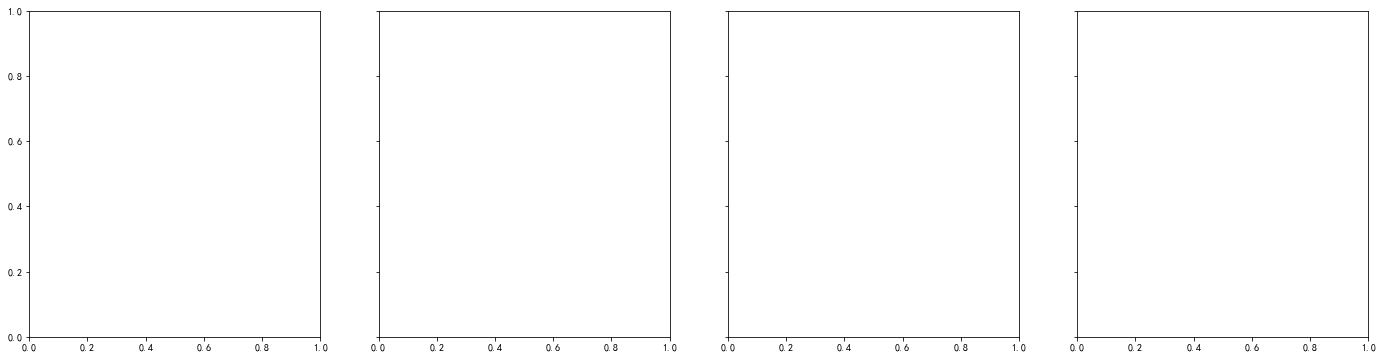

In [116]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

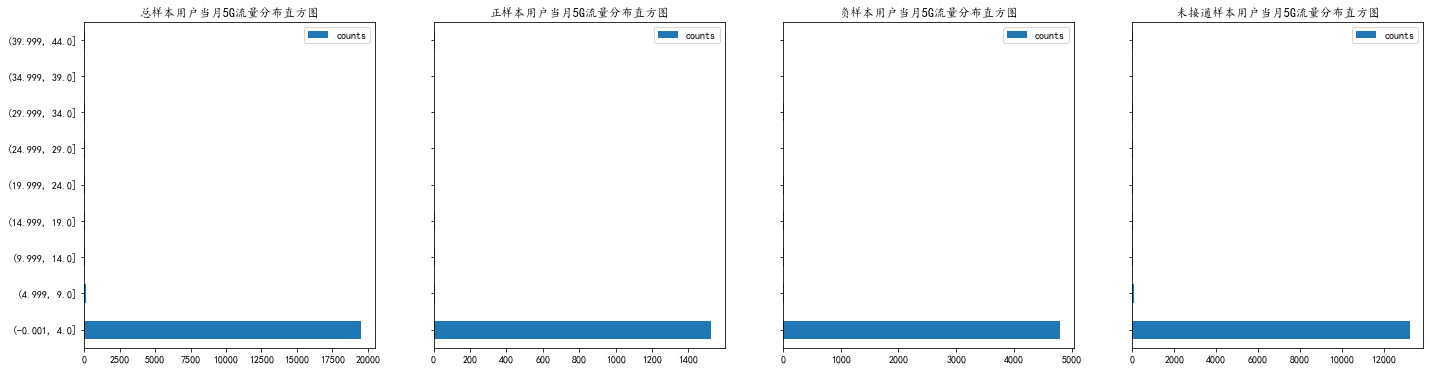

In [117]:
all_data_flow_amnt_5G.plot.barh(y="counts", title='总样本用户当月5G流量分布直方图', ax=axes[0])
y_data_flow_amnt_5G.plot.barh(y="counts", title='正样本用户当月5G流量分布直方图', ax=axes[1])
n_data_flow_amnt_5G.plot.barh(y="counts", title='负样本用户当月5G流量分布直方图', ax=axes[2])
x_data_flow_amnt_5G.plot.barh(y="counts", title='未接通样本用户当月5G流量分布直方图', ax=axes[3])
fig

# 对DATA_FLOW_AMNT_4G的统计分析

In [96]:
df_all.DATA_FLOW_AMNT_4G.max()

237053.94

In [118]:
all_data_flow_amnt_4G = compulete_count_normalized(df_all.DATA_FLOW_AMNT_4G, 0,24000, 500)
y_data_flow_amnt_4G = compulete_count_normalized(df_Y.DATA_FLOW_AMNT_4G, 0,24000, 500)
n_data_flow_amnt_4G = compulete_count_normalized(df_N.DATA_FLOW_AMNT_4G, 0,24000, 500)
x_data_flow_amnt_4G = compulete_count_normalized(df_X.DATA_FLOW_AMNT_4G, 0,24000, 500)

In [119]:
all_data_flow_amnt_4G = all_data_flow_amnt_4G.sort_values(by=["counts"], ascending=False).head(20)
y_data_flow_amnt_4G = y_data_flow_amnt_4G.sort_values(by=["counts"], ascending=False).head(15)
n_data_flow_amnt_4G = n_data_flow_amnt_4G.sort_values(by=["counts"], ascending=False).head(15)
x_data_flow_amnt_4G = x_data_flow_amnt_4G.sort_values(by=["counts"], ascending=False).head(15)

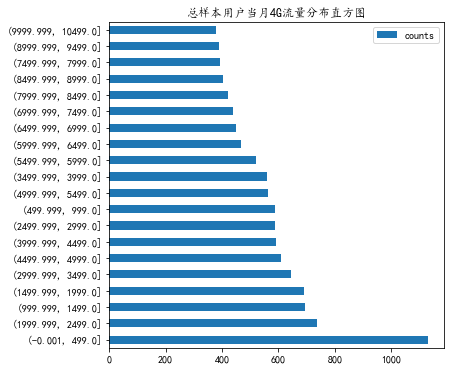

In [120]:
all_data_flow_amnt_4G.plot.barh(y="counts", figsize=(6, 6), title='总样本用户当月4G流量分布直方图')

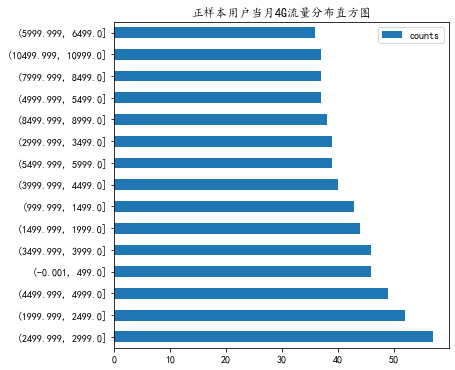

In [121]:
y_data_flow_amnt_4G.plot.barh(y="counts", figsize=(6, 6), title='正样本用户当月4G流量分布直方图')

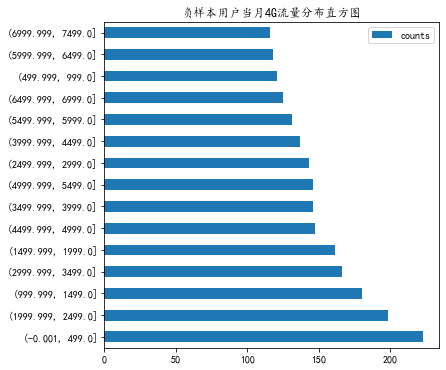

In [122]:
n_data_flow_amnt_4G.plot.barh(y="counts", figsize=(6, 6), title='负样本用户当月4G流量分布直方图')

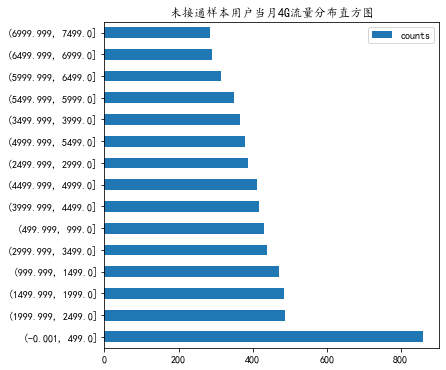

In [123]:
x_data_flow_amnt_4G.plot.barh(y="counts", figsize=(6, 6), title='未接通样本用户当月4G流量分布直方图')

# 对SMS_COUNT的统计分析

In [102]:
df_all.SMS_COUNT.max()

6284

In [124]:
all_sms_count = compulete_count_normalized(df_all.SMS_COUNT, 0, 24, 3)
y_sms_count = compulete_count_normalized(df_Y.SMS_COUNT, 0, 24, 3)
n_sms_count = compulete_count_normalized(df_N.SMS_COUNT, 0, 24, 3)
x_sms_count = compulete_count_normalized(df_X.SMS_COUNT, 0, 24, 3)

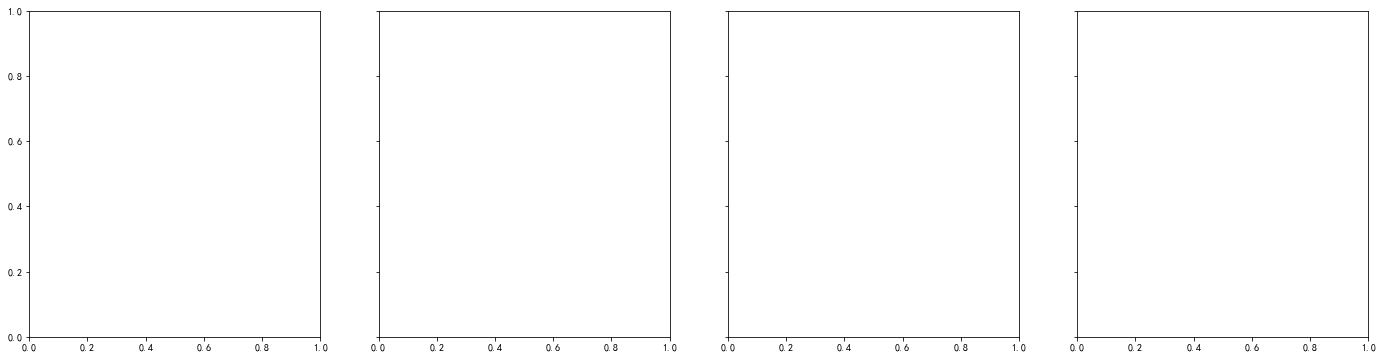

In [125]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

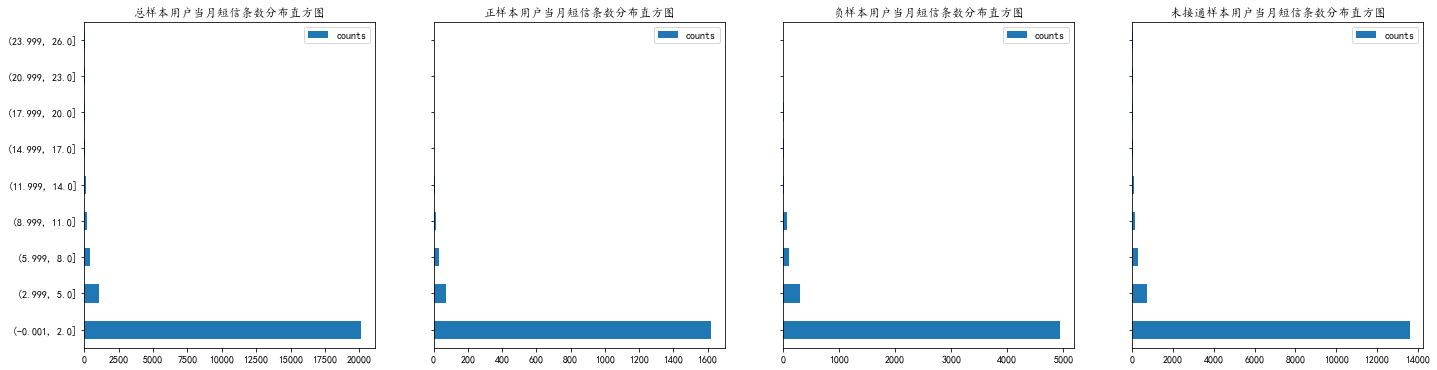

In [126]:
all_sms_count.plot.barh(y="counts", title='总样本用户当月短信条数分布直方图', ax=axes[0])
y_sms_count.plot.barh(y="counts", title='正样本用户当月短信条数分布直方图', ax=axes[1])
n_sms_count.plot.barh(y="counts", title='负样本用户当月短信条数分布直方图', ax=axes[2])
x_sms_count.plot.barh(y="counts", title='未接通样本用户当月短信条数分布直方图', ax=axes[3])
fig

绝大部分用户的每月短信数都在2条左右，该特征价值不大

# 对CALLED_DRTN的统计分析

In [128]:
all_called_drtn = compulete_count_normalized(df_all.CALLED_DRTN, 0, 2000, 100, '当月')
y_called_drtn = compulete_count_normalized(df_Y.CALLED_DRTN, 0, 2000, 100, '当月')
n_called_drtn = compulete_count_normalized(df_N.CALLED_DRTN, 0, 2000, 100, '当月')
x_called_drtn = compulete_count_normalized(df_X.CALLED_DRTN, 0, 2000, 100, '当月')

all_called_drtn01 = compulete_count_normalized(df_all.CALLED_DRTN01, 0, 2000, 100, '上月')
y_called_drtn01 = compulete_count_normalized(df_Y.CALLED_DRTN01, 0, 2000, 100, '上月')
n_called_drtn01 = compulete_count_normalized(df_N.CALLED_DRTN01, 0, 2000, 100, '上月')
x_called_drtn01 = compulete_count_normalized(df_X.CALLED_DRTN01, 0, 2000, 100, '上月')

all_called_drtn02 = compulete_count_normalized(df_all.CALLED_DRTN02, 0, 2000, 100, '上上月')
y_called_drtn02 = compulete_count_normalized(df_Y.CALLED_DRTN02, 0, 2000, 100, '上上月')
n_called_drtn02 = compulete_count_normalized(df_N.CALLED_DRTN02, 0, 2000, 100, '上上月')
x_called_drtn02 = compulete_count_normalized(df_X.CALLED_DRTN02, 0, 2000, 100, '上上月')

# all_called_drtn03 = compulete_count_normalized(df_all.CALLED_DRTN03, 0, 2000, 100, '前三月')
# y_called_drtn03 = compulete_count_normalized(df_Y.CALLED_DRTN03, 0, 2000, 100, '前三月')
# n_called_drtn03 = compulete_count_normalized(df_N.CALLED_DRTN03, 0, 2000, 100, '前三月')
# x_called_drtn03 = compulete_count_normalized(df_X.CALLED_DRTN03, 0, 2000, 100, '前三月')

In [129]:
concat_all_called_drtn = pd.concat([all_called_drtn.当月, 
                                    all_called_drtn01.上月,
                                    all_called_drtn02.上上月] ,axis=1)
concat_all_called_drtn = concat_all_called_drtn.reindex([(x.right+1) for x in concat_all_called_drtn.index])

concat_y_called_drtn = pd.concat([y_called_drtn.当月, 
                                    y_called_drtn01.上月,
                                    y_called_drtn02.上上月] ,axis=1)
concat_y_called_drtn = concat_y_called_drtn.reindex([(x.right+1) for x in concat_y_called_drtn.index])

concat_n_called_drtn = pd.concat([n_called_drtn.当月, 
                                    n_called_drtn01.上月,
                                    n_called_drtn02.上上月] ,axis=1)
concat_n_called_drtn = concat_n_called_drtn.reindex([(x.right+1) for x in concat_n_called_drtn.index])

concat_x_called_drtn = pd.concat([x_called_drtn.当月, 
                                    x_called_drtn01.上月,
                                    x_called_drtn02.上上月] ,axis=1)
concat_x_called_drtn = concat_x_called_drtn.reindex([(x.right+1) for x in concat_x_called_drtn.index])

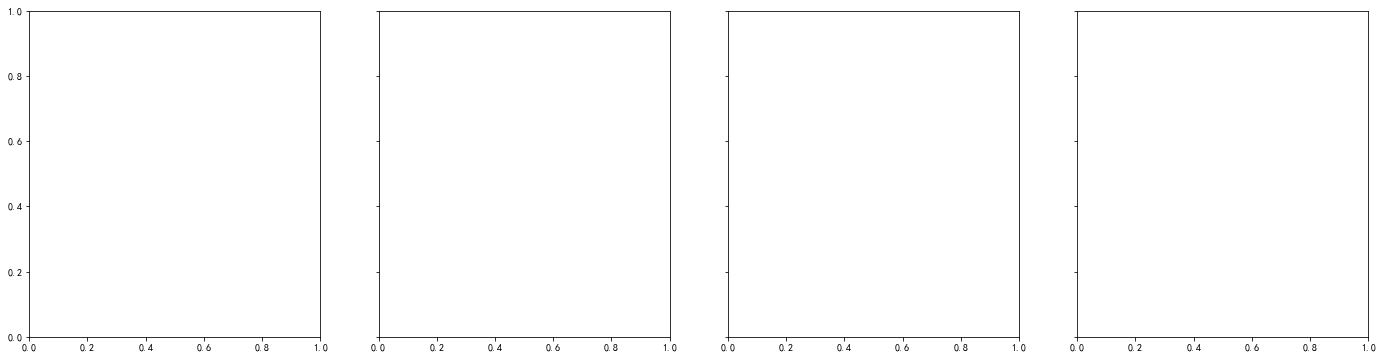

In [130]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

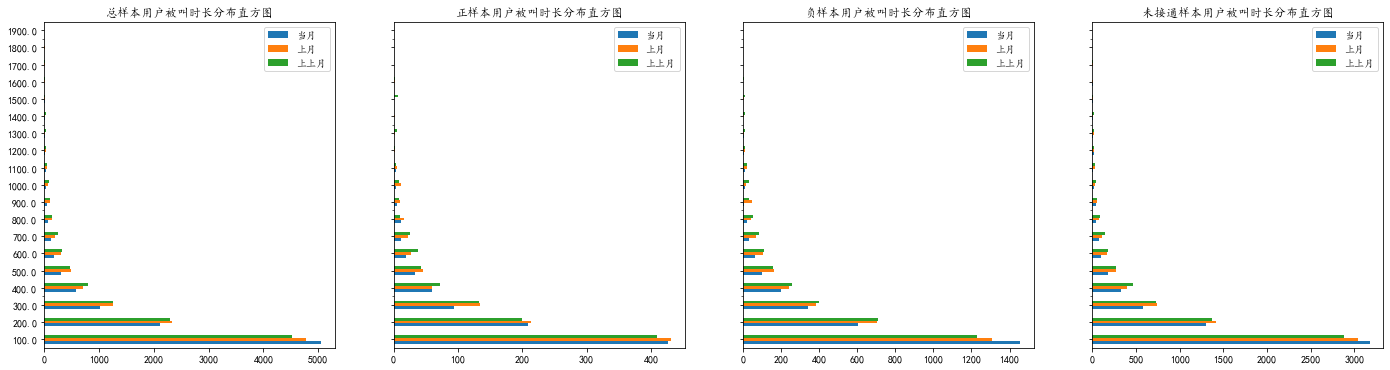

In [131]:
concat_all_called_drtn.plot.barh( title='总样本用户被叫时长分布直方图', ax=axes[0])
concat_y_called_drtn.plot.barh( title='正样本用户被叫时长分布直方图', ax=axes[1])
concat_n_called_drtn.plot.barh( title='负样本用户被叫时长分布直方图', ax=axes[2])
concat_x_called_drtn.plot.barh( title='未接通样本用户被叫时长分布直方图', ax=axes[3])
fig

# 对CALL_COUNT的统计分析

In [111]:
df_all.CALL_COUNT.max()

2429

In [132]:
all_call_count = compulete_count_normalized(df_all.CALL_COUNT, 0, 1000, 50)
y_call_count = compulete_count_normalized(df_Y.CALL_COUNT, 0, 1000, 50)
n_call_count = compulete_count_normalized(df_N.CALL_COUNT, 0, 1000, 50)
x_call_count = compulete_count_normalized(df_X.CALL_COUNT, 0, 1000, 50)

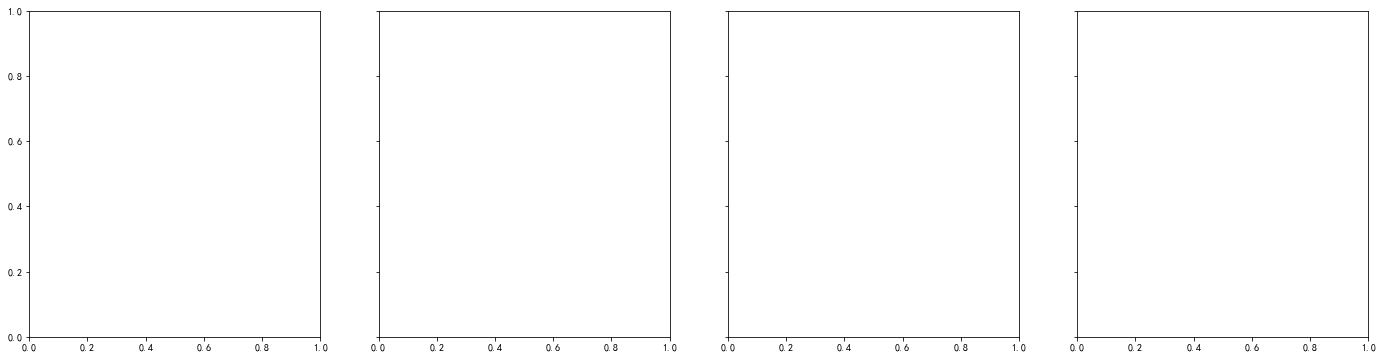

In [133]:
fig,axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

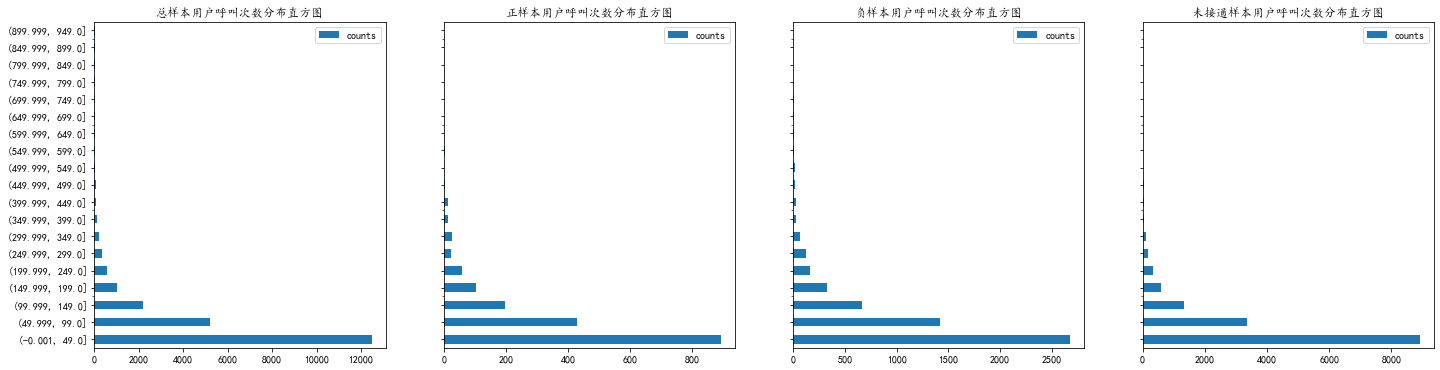

In [134]:
all_call_count.plot.barh(y="counts", title='总样本用户呼叫次数分布直方图', ax=axes[0])
y_call_count.plot.barh(y="counts", title='正样本用户呼叫次数分布直方图', ax=axes[1])
n_call_count.plot.barh(y="counts", title='负样本用户呼叫次数分布直方图', ax=axes[2])
x_call_count.plot.barh(y="counts", title='未接通样本用户呼叫次数分布直方图', ax=axes[3])
fig

# 对CALLING_DRTN的统计分析

In [135]:
all_calling_drtn = compulete_count_normalized(df_all.CALLING_DRTN, 0, 1500, 100, '当月')
y_calling_drtn = compulete_count_normalized(df_Y.CALLING_DRTN, 0, 1500, 100, '当月')
n_calling_drtn = compulete_count_normalized(df_N.CALLING_DRTN, 0, 1500, 100, '当月')
x_calling_drtn = compulete_count_normalized(df_X.CALLING_DRTN, 0, 1500, 100, '当月')

all_calling_drtn01 = compulete_count_normalized(df_all.CALLING_DRTN01, 0, 1500, 100, '上月')
y_calling_drtn01 = compulete_count_normalized(df_Y.CALLING_DRTN01, 0, 1500, 100, '上月')
n_calling_drtn01 = compulete_count_normalized(df_N.CALLING_DRTN01, 0, 1500, 100, '上月')
x_calling_drtn01 = compulete_count_normalized(df_X.CALLING_DRTN01, 0, 1500, 100, '上月')

all_calling_drtn02 = compulete_count_normalized(df_all.CALLING_DRTN02, 0, 1500, 100, '上上月')
y_calling_drtn02 = compulete_count_normalized(df_Y.CALLING_DRTN02, 0, 1500, 100, '上上月')
n_calling_drtn02 = compulete_count_normalized(df_N.CALLING_DRTN02, 0, 1500, 100, '上上月')
x_calling_drtn02 = compulete_count_normalized(df_X.CALLING_DRTN02, 0, 1500, 100, '上上月')

In [136]:
concat_all_calling_drtn = pd.concat([
                                    all_calling_drtn.当月,
                                    all_calling_drtn01.上月,
                                   all_calling_drtn02.上上月] ,axis=1)
concat_all_calling_drtn = concat_all_calling_drtn.reindex([(x.right+1) for x in concat_all_calling_drtn.index])

concat_y_calling_drtn = pd.concat([                              
                                    y_calling_drtn.当月,
                                    y_calling_drtn01.上月,
                                   y_calling_drtn02.上上月] ,axis=1)
concat_y_calling_drtn = concat_y_calling_drtn.reindex([(x.right+1) for x in concat_y_calling_drtn.index])

concat_n_calling_drtn = pd.concat([
                                    n_calling_drtn.当月,
                                    n_calling_drtn01.上月,
                                   n_calling_drtn02.上上月] ,axis=1)
concat_n_calling_drtn = concat_n_calling_drtn.reindex([(x.right+1) for x in concat_n_calling_drtn.index])

concat_x_calling_drtn = pd.concat([
                                    x_calling_drtn.当月,
                                    x_calling_drtn01.上月,
                                   x_calling_drtn02.上上月] ,axis=1)
concat_x_calling_drtn = concat_x_calling_drtn.reindex([(x.right+1) for x in concat_x_calling_drtn.index])

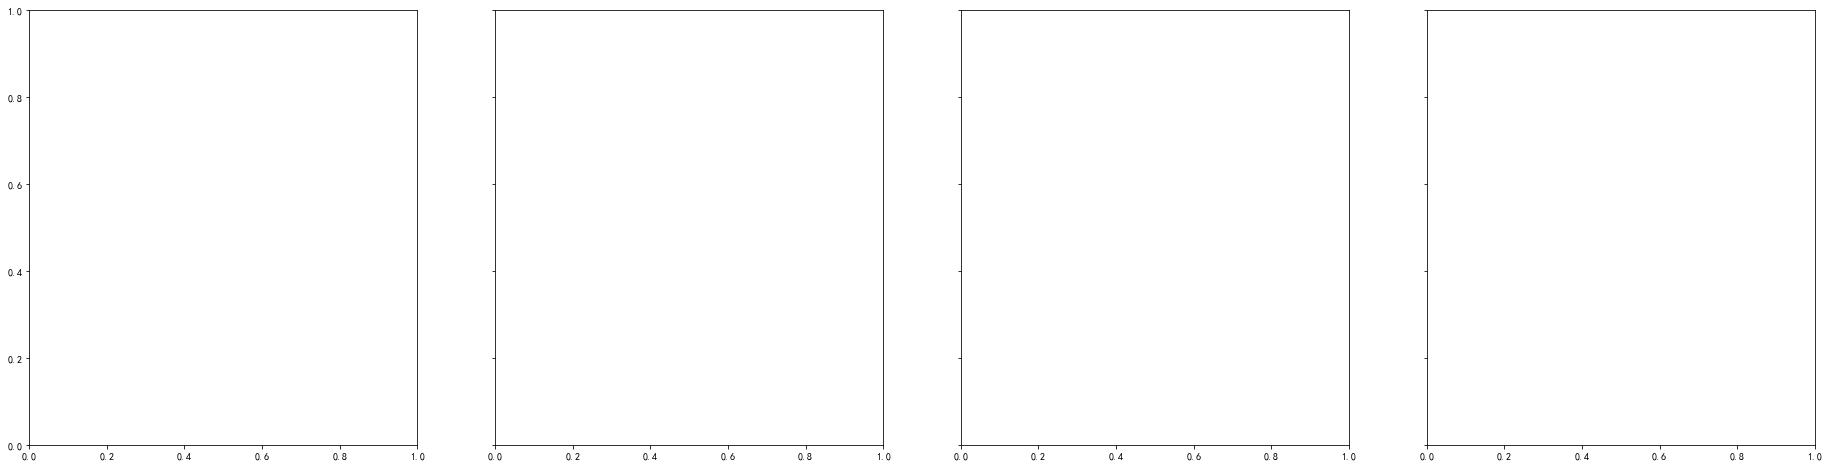

In [137]:
fig,axes = plt.subplots(1, 4, figsize=(32, 8), sharey=True)

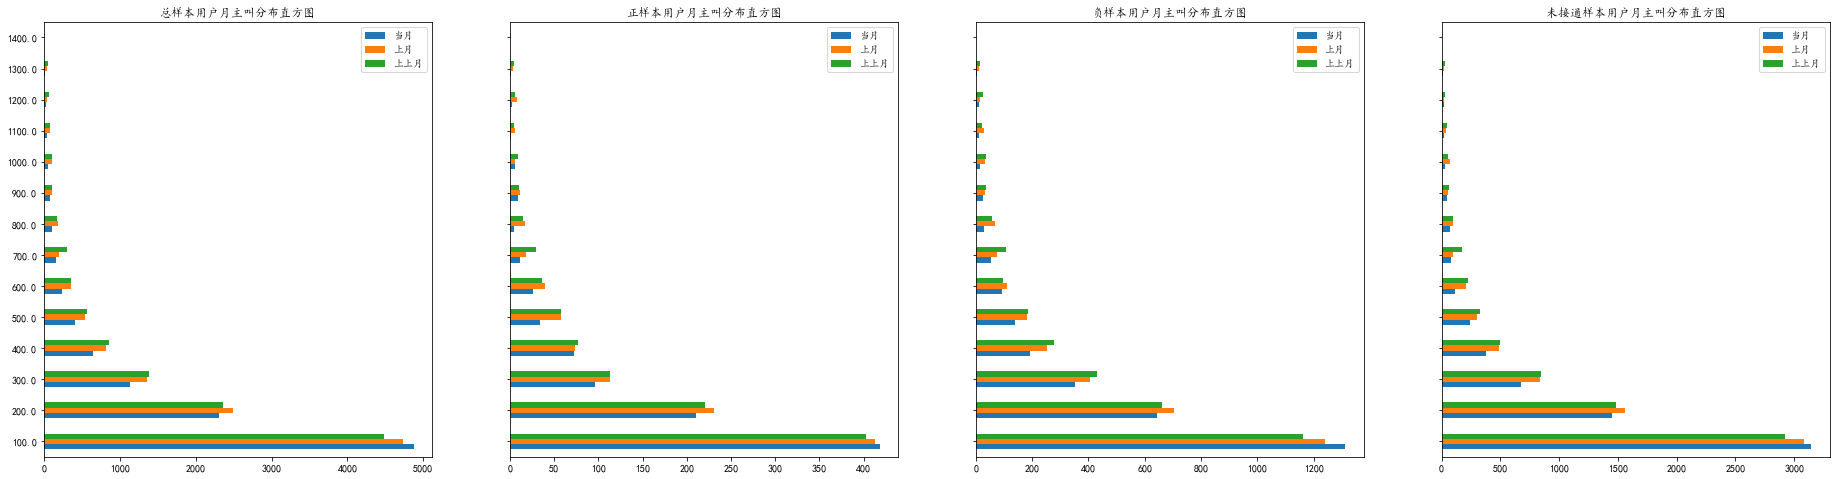

In [138]:
concat_all_calling_drtn.plot.barh(title='总样本用户月主叫分布直方图', ax=axes[0])
concat_y_calling_drtn.plot.barh(title='正样本用户月主叫分布直方图', ax=axes[1])
concat_n_calling_drtn.plot.barh(title='负样本用户月主叫分布直方图', ax=axes[2])
concat_x_calling_drtn.plot.barh(title='未接通样本用户月主叫分布直方图', ax=axes[3])
fig